### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Attribute information

#### Input variables:

Bank client data:

1.  age:Continuous feature 
2.  job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3.  marital: marital status(married, single, divorced)
4.  education:education level (primary, secondary, tertiary)
5.  default: has credit in default? 
6.  housing: has housing loan? 
7.  loan: has personal loan?
8.  balance in account

#### Related to previous contact:

9.  contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds

#### Other attributes:

13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before forthe last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

#### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)





### High Level Steps to be followed  

1. Import required Libraries

2. Load into pandas dataframe

3. Exploratory Data Analysis
    
    3.1. Information of the Dataframe to find out data type, shape of the dataframe
    
    3.2. Find out number of records having null records
    
    3.3. Convert the object type to category if the number of unique records for the given field less or equal than 15
    
4. Univariate Analyis

    4.1. Using Matplotlib Bar plot
    
    4.2. Using Seaborn Count Plot with hue as output variable
    
5. With an assumption that each independent input variables are independent of each outher, perform the encoding of the categorical variable wherever it is required.

6. Bivariate Analysis 
     
    6.1  Using Seaborn Pairplot
    
    6.2  Using Seaborn Boxplot
    
    6.3  Find out the correation using seaborn heatmap
    
7. Spliting the data into Training and Test 

8. Logistic Regression Technique

9. Decision Tree Technique

10. Ensemble Technique - Bagging

11. Ensemble Technique - Random Forest

12. Ensemble Technique - Adaptive Boosting

13. Ensemble Technique - Gradient Boosting

 

## Import relevant python libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Dataframe related library
import pandas as pd
import numpy as np 

#Plotting Library
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Splitting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split

#Label Encoding
from sklearn.preprocessing import LabelEncoder

#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

#Decision Tree 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
import graphviz
from yellowbrick.classifier import ClassificationReport, ROCAUC

#Bagging Ensemble Technique
from sklearn.ensemble import bagging
from sklearn.ensemble import BaggingClassifier as bc
from sklearn.ensemble import BaggingRegressor as br

#Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier as abc
from sklearn.ensemble import AdaBoostRegressor as abr

#Gradient Boosting Ensemble Technique
from sklearn.ensemble import gradient_boosting as gb
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import GradientBoostingRegressor as gbr

#Random Forest Ensemble Technique
from sklearn.ensemble import forest as rf
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr



In [3]:
# Setting the environment to display all the rows 
#pd.set_option('display.max_rows', None)

# Setting the environment to display all the columns 
pd.set_option('display.max_columns', None)

In [4]:
df_bank = pd.read_csv(r'G:\bank-full.csv')

In [5]:
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df_bank.shape

(45211, 17)

In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df_bank.columns = df_bank.columns.str.strip()

### Null check validation

In [9]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

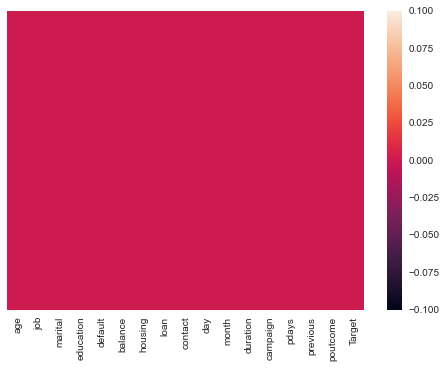

In [10]:
sns.heatmap(df_bank.isnull(),yticklabels=False);

### Unique records validation

In [11]:
#Check number of unique value in each field of dataframe
df_bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

### Listing unique records 
- where datatype is object 
- Converting object type to category where unique category count is less 15

In [12]:
for ind in df_bank.columns.values:
    if df_bank[ind].dtype == 'object':
        cnt = df_bank[ind].nunique()
        print("---------------------------------------------------------------------------------------------------------\n")
        print(ind," is having ",cnt," unique value")
        print(ind," unique values are ",df_bank[ind].unique())
        
        #if the number of unique value is less than 15 then convert the datatype as category
        if cnt <= 15:
            #print("Data Type before conversion ",df_bank[ind].dtype)
            df_bank[ind] = df_bank[ind].astype('category')
            #print("Data Type after conversion ",df_bank[ind].dtype)

---------------------------------------------------------------------------------------------------------

job  is having  12  unique value
job  unique values are  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
---------------------------------------------------------------------------------------------------------

marital  is having  3  unique value
marital  unique values are  ['married' 'single' 'divorced']
---------------------------------------------------------------------------------------------------------

education  is having  4  unique value
education  unique values are  ['tertiary' 'secondary' 'unknown' 'primary']
---------------------------------------------------------------------------------------------------------

default  is having  2  unique value
default  unique values are  ['no' 'yes']
-------------------------------------------------------------------------------

### Data Clean up 
- Where most of the categorical field having value as "unknown"

In [13]:
df_bank[(df_bank['job'] == 'unknown') & ( df_bank['education'] == 'unknown') & ( df_bank['contact'] == 'unknown') & ( df_bank['poutcome'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
2046,57,unknown,married,unknown,no,106,no,no,unknown,12,may,836,4,-1,0,unknown,no
2848,25,unknown,single,unknown,no,329,yes,no,unknown,14,may,158,2,-1,0,unknown,no
3513,55,unknown,married,unknown,no,666,no,no,unknown,15,may,73,5,-1,0,unknown,no
3985,46,unknown,married,unknown,no,300,yes,no,unknown,16,may,323,3,-1,0,unknown,no
4750,38,unknown,married,unknown,no,124,yes,no,unknown,20,may,37,13,-1,0,unknown,no
6966,57,unknown,married,unknown,no,327,yes,no,unknown,28,may,74,2,-1,0,unknown,no


### Data Insight 
One of the records is where Target is 'yes' and these records can be dropped

In [14]:
index_list = df_bank[(df_bank['job'] == 'unknown') & ( df_bank['education'] == 'unknown') & ( df_bank['contact'] == 'unknown') & ( df_bank['poutcome'] == 'unknown')].index.tolist()

In [15]:
df_bank.drop(index_list, inplace = True, axis = 0 )
df_bank.reset_index(drop=True)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
5,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
6,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
7,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
8,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
9,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no


In [16]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000
mean,40.927608,1362.265407,15.809022,258.224218,2.763514,40.247093,0.581017
std,10.618461,3045.167218,8.323981,257.592194,3.098558,100.178456,2.304730
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Data Insight

1. <b>Age</b> seems to be fine where it ranges from 18 till 95, what need to find out how many who are age above 60 offered termed deposit and they opted for it. This can be converted into number of age ranges rather than looking at for each and every age.

2. There is <b>balance</b> which are in negative and can be termed that customer has negative balance towards bank. Need to find 

    - whether such customer was offered term deposit and if yes then how many of them have opted in for it. 
    - If the hit ratio among these customer is high then it great for the bank to reduce the negative balance.

    2.1. There is huge difference between 3rd qurtile and the maximum value.
    
    2.2. Difference between maximum and third quartile is around 100k which is quite a more.
    
    2.3. Difference between first quartile & second quartile and when it is compare with difference between third quartile and seconds quartile is around 380 vs around 1000 which reflects great skewness in the data.
    
    2.3. Standard deviation is arond 3044 confirming the strong skewness in the data.
  
    With above point said, balance needs to be handled to find out how many outliers are there and depending upon take decision. 

3. <b>Day</b> is ranging from 1 to 31 and it is not an issue. This can be converted into categorical variable. 

4. <b>Duration</b> is again ranging from 0 till 4918 seconds and before it can be normalized like converting in min, find out how many of the customers are there which is less than 30 seconds. If there are not many customers then it can be converted into minute

5. <b>Campaign</b> is number of contacts made to the customer in the current reach. Need to find out whether there is relation beteween number of contacts made vs customer opting for term deposit. 

6. Definition of the <b>pdays</b> say that customer not all contacted vs contacted more than 900 days ago assigned same value as -1. Also if we look at first, second and third quartiles all have the same value of -1 which is as of now indicating banks has either not reached out to most of the customer or contacted more than 900 days ago. Need to find out

    - how many are customer where contact period is not -1 and opted for Term Deposit
    
    - how many are customer where contact period is -1 and opted for Term Deposit. 
    
    If the result comes out to be less than 50 and most of the customer whose pdays is -1 has not opted for Term Deposit means this parameter do not have an impact on the target variable. 

7. <b>previous</b> indicating number of times client has been contacted. Looking at the data, first, second and third quartiles all have the same value of 0 with standard deviation of 2 but with maximum value of 275. 

    - Find out how many of the customer not contacted but choose term deposit
    
    - Find out how many of the customer contacted and choose term deposit. Out of these result set find out how many times these customer was contacted in order to find average time a person has been contacted.

In [17]:
#Convert the target variable into integer value where yes is 1 and no is 0
df_bank['Target_Int'] = df_bank['Target'].replace(to_replace = ['no','yes'] , value = [0,1])

In [18]:
df_bank.skew()

age            0.686670
balance        8.362487
day            0.092747
duration       3.144769
campaign       4.900901
pdays          2.613555
previous      41.825336
Target_Int     2.381708
dtype: float64

Field "previous" is highly skewed and it is because of assigning the value as -1 when the number of days is more than 900 days

### Univariate Exploratory Data Analysis

#### Calcuate the quantiles of the variables and map the variables using boxplot

In [19]:
df_bank.quantile([.25, .5, .75], axis = 0)

,age,balance,day,duration,campaign,pdays,previous,Target_Int
0.25,33.0,72.0,8.0,103.0,1.0,-1.0,0.0,0.0
0.50,39.0,448.0,16.0,180.0,2.0,-1.0,0.0,0.0
0.75,48.0,1427.0,21.0,319.0,3.0,-1.0,0.0,0.0


### Outlier Identification and remediation

In [20]:
# Find out how many values are there which is greater than Inter quartile
df_bank_quant = df_bank.quantile([.25, .5, .75], axis = 0)
for ind in df_bank_quant.columns.values:
    if ( ind not in ['age','day'] ):
        IQR = df_bank_quant.loc[0.75,ind] - df_bank_quant.loc[0.25,ind]
        Max_Whisker = df_bank_quant.loc[0.75,ind] + 1.5 * IQR
        Min_Whisker = df_bank_quant.loc[0.25,ind] - 1.5 * IQR
        
        print("---------------------------------------------------------------------------------------------\n")
        print("For the field '",ind.strip(' '),"' Inter Quartile is ",IQR)
        print("Max and Min Whisker is %d and %d"%(Max_Whisker,Min_Whisker))
        
        Outlier_Nbr = df_bank[ind][ (df_bank[ind] > Max_Whisker ) | ( df_bank[ind] < Min_Whisker )].shape[0]
        print("Total outlier for %s is %d" %(ind,Outlier_Nbr))
        print("Percentage of these outlier out of total is %f" %(Outlier_Nbr/df_bank.shape[0]))

---------------------------------------------------------------------------------------------

For the field ' balance ' Inter Quartile is  1355.0
Max and Min Whisker is 3459 and -1960
Total outlier for balance is 4732
Percentage of these outlier out of total is 0.104790
---------------------------------------------------------------------------------------------

For the field ' duration ' Inter Quartile is  216.0
Max and Min Whisker is 643 and -221
Total outlier for duration is 3233
Percentage of these outlier out of total is 0.071595
---------------------------------------------------------------------------------------------

For the field ' campaign ' Inter Quartile is  2.0
Max and Min Whisker is 6 and -2
Total outlier for campaign is 3058
Percentage of these outlier out of total is 0.067719
---------------------------------------------------------------------------------------------

For the field ' pdays ' Inter Quartile is  0.0
Max and Min Whisker is -1 and -1
Total outlier for

In [21]:
df_bank[(df_bank['duration'] < 60) ]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0
17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no,0
19,33,services,married,secondary,no,0,yes,no,unknown,5,may,54,1,-1,0,unknown,no,0
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no,0
57,47,blue-collar,married,unknown,no,306,yes,no,unknown,5,may,13,1,-1,0,unknown,no,0
82,42,technician,single,secondary,no,690,yes,no,unknown,5,may,20,1,-1,0,unknown,no,0
90,42,management,single,secondary,no,50,no,no,unknown,5,may,48,1,-1,0,unknown,no,0
103,59,blue-collar,married,primary,no,179,yes,no,unknown,5,may,55,3,-1,0,unknown,no,0
107,34,admin.,married,secondary,no,61,no,yes,unknown,5,may,21,1,-1,0,unknown,no,0


balance
duration
campaign
pdays
previous


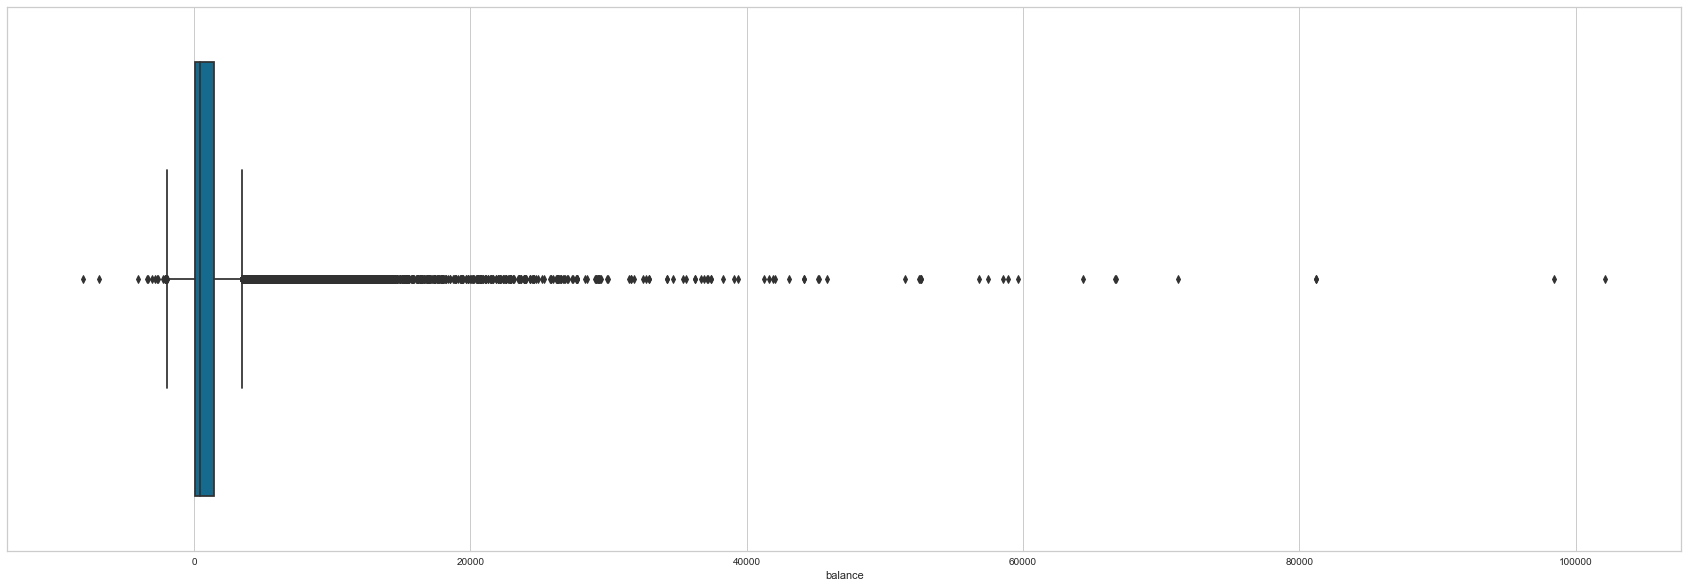

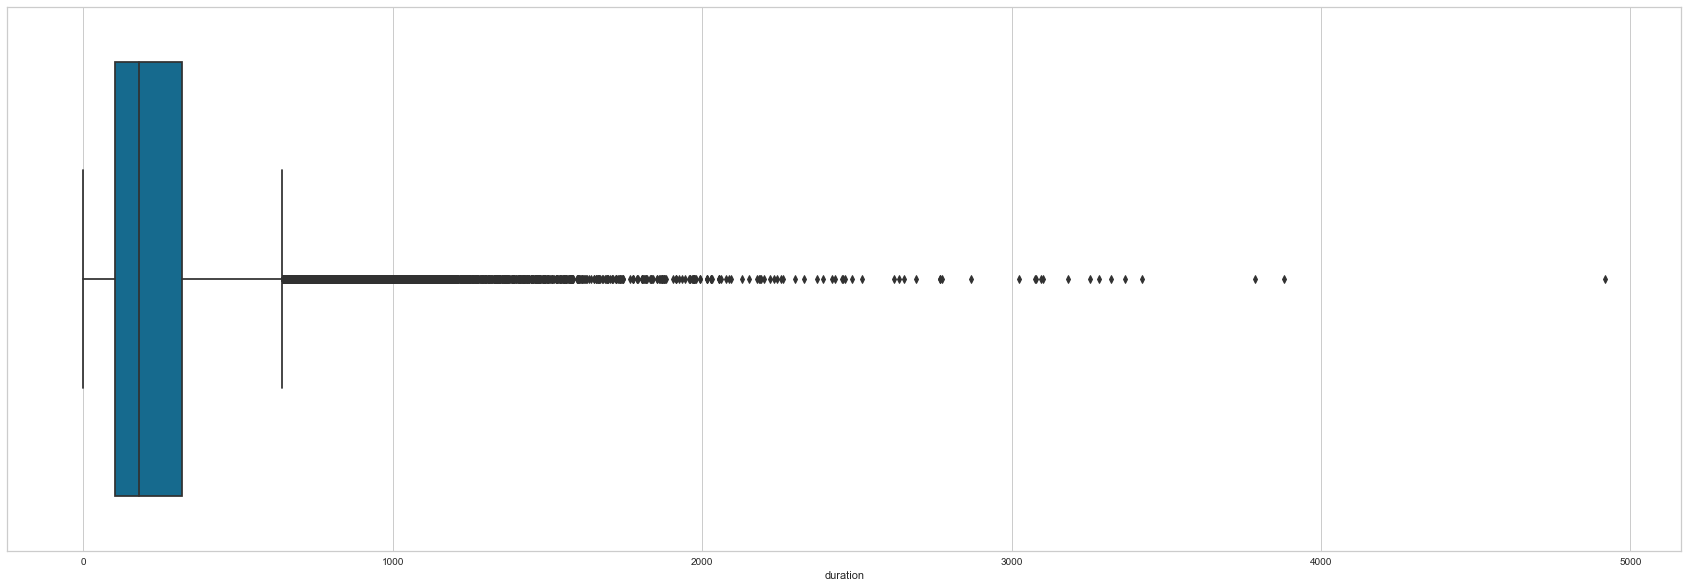

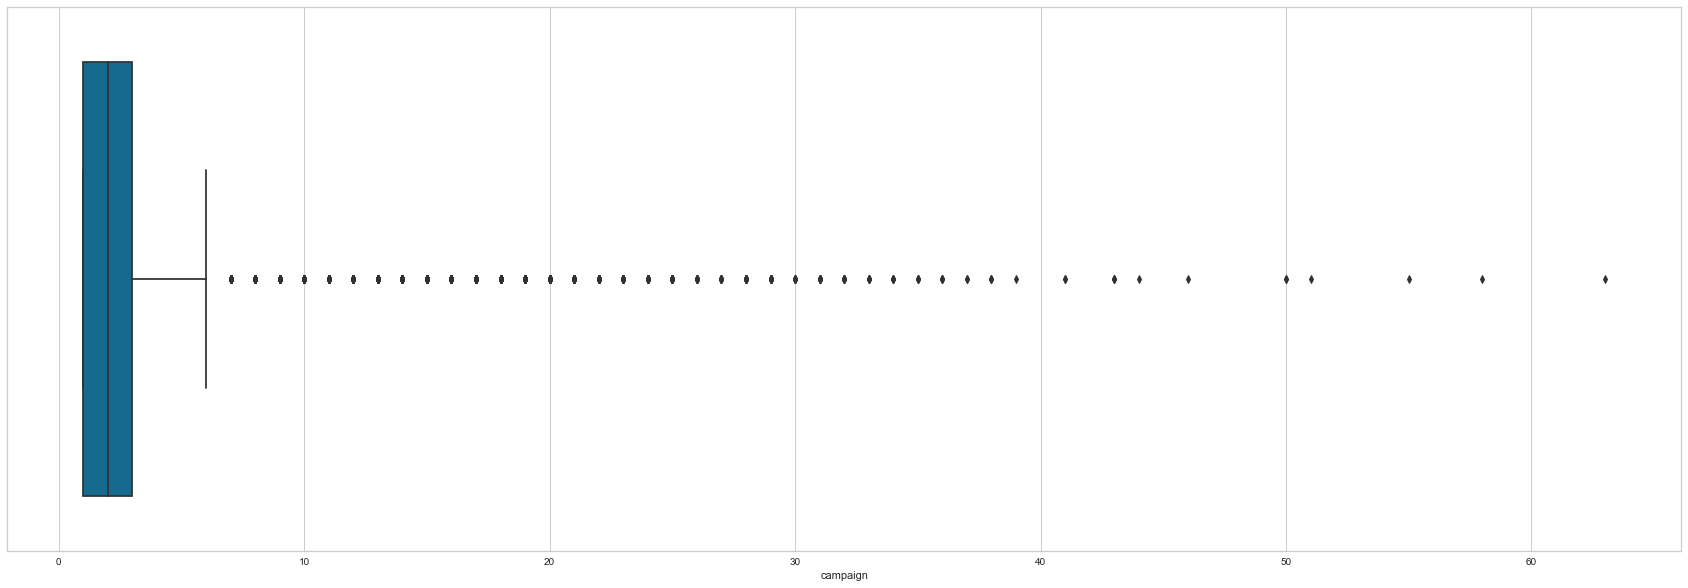

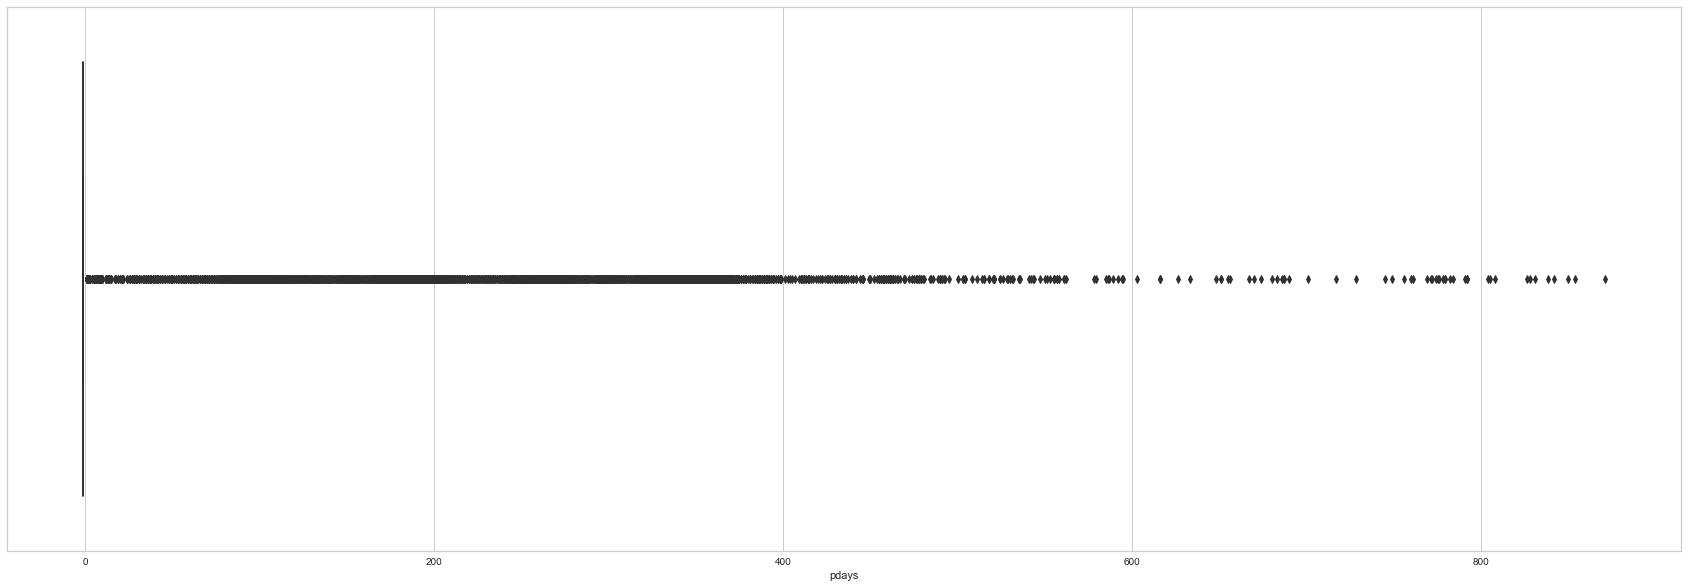

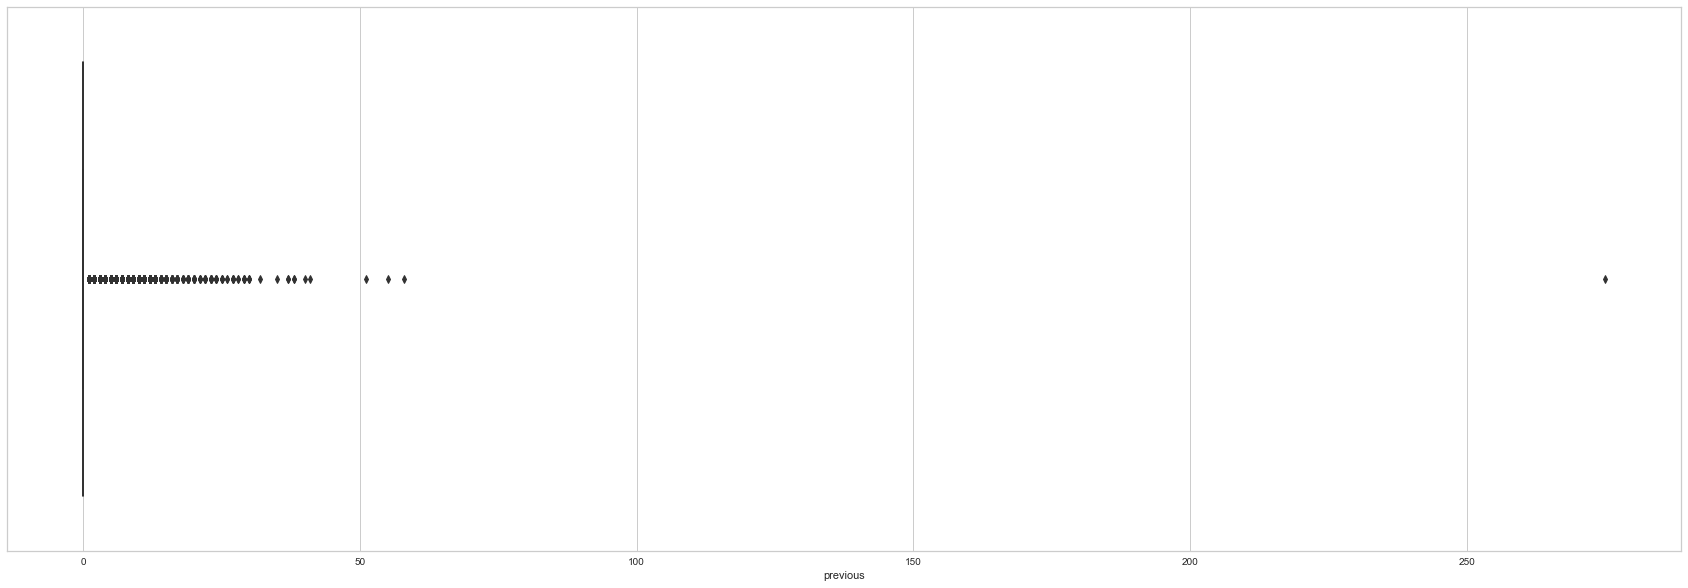

In [22]:
for ind in ['balance','duration','campaign','pdays', 'previous']:
    print(ind)
    plt.figure(figsize= (30,10))
    sns.boxplot(df_bank[ind])

### Data Insight - Outliers 
Looking at the outliers present in the data from looking at the size and the box plot, below are the insight. 

| Attribute Name | Outliers present | Outliers Percentage| Remediation Done | Explanation                                      | 
|----------------|------------------|--------------------|------------------|--------------------------------------------------|
| balance        | Yes              | 10.50              | No               | Outlier percentage is a sizable number and therefore keeping these outliers|
| duration       | Yes              |  7.10              | No               | Outlier percentage is a sizable number and therefore keeping these outiers |
| campaign       | Yes              |  6.78              | No               | Outlier percentage is a sizable number and therefore keeping these outiers |
| pdays          | Yes              | 18.26              | No               | Outlier percentage is a sizable number and therefore keeping these outiers |
| previous       | Yes              | 18.26              | No               | Outlier percentage is a sizable number and therefore keeping these outiers |

This can be revisted after looking at the immpact of this outliers on target variable "Target"

#### Categorical Variable - Count Plot - Not Normlized 

job


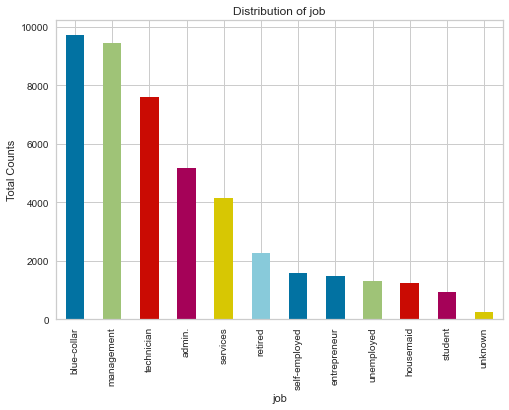

marital


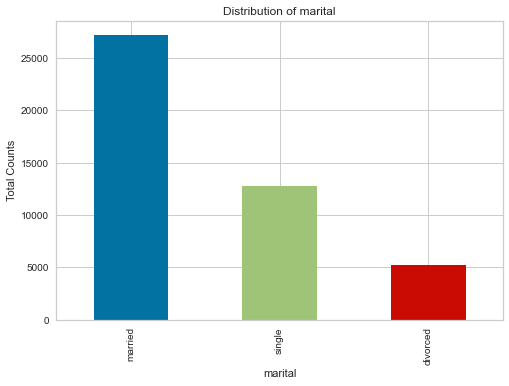

education


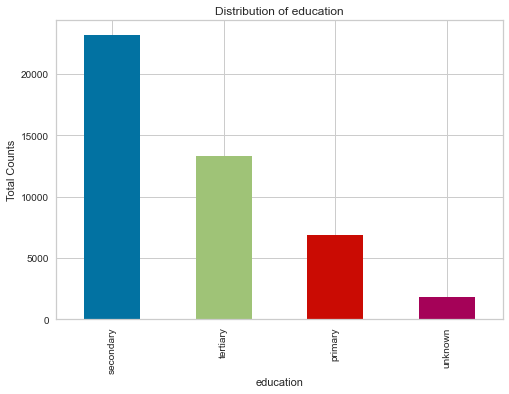

default


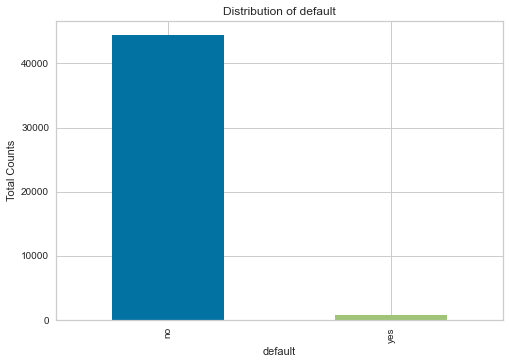

housing


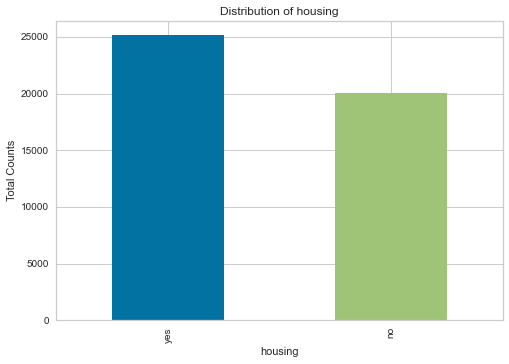

loan


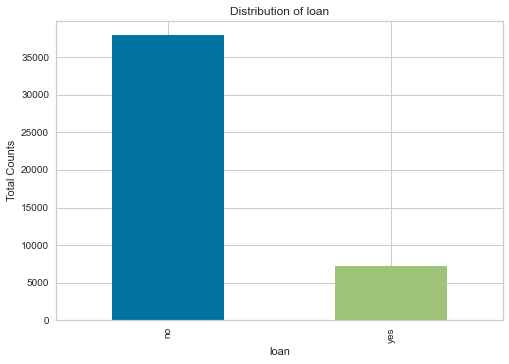

contact


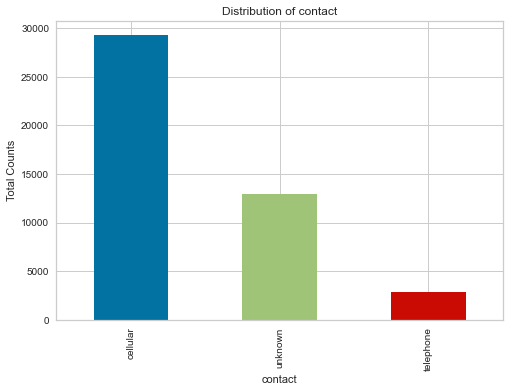

month


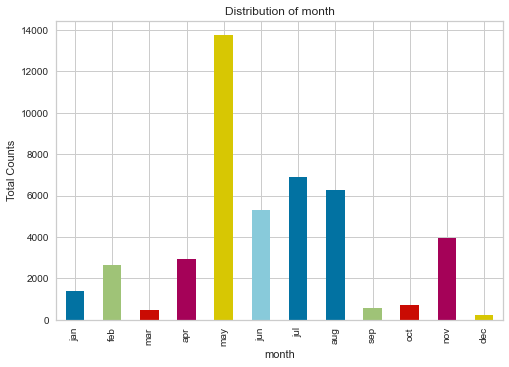

poutcome


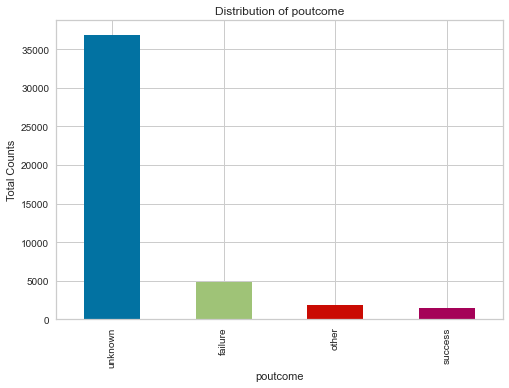

Target


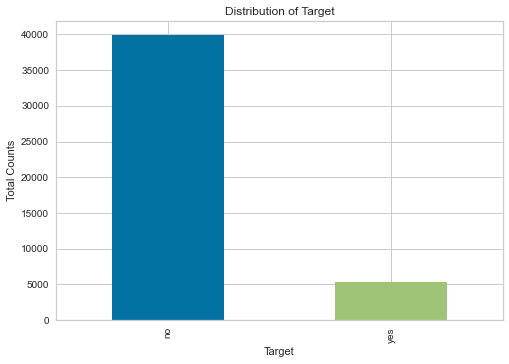

In [23]:
#Plotting the value counts of all the categorical variable using matplotlib
for ind in df_bank.select_dtypes(include='category').columns:
    print(ind)
    if ind == 'month':
        #Ordering the plot according to month in a year
        df_bank[ind].value_counts().reindex(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']).plot(kind='bar')
    else:
        df_bank[ind].value_counts().plot(kind='bar')
    x_label = ind
    y_label = "Total Counts"
    plt_title = "Distribution of " + ind
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plt_title)
    plt.show()

#### Categorical Variable - Count Plot -  normalized 

admin.           0.114512
blue-collar      0.215515
entrepreneur     0.032930
housemaid        0.027460
management       0.209447
retired          0.050136
self-employed    0.034967
services         0.091990
student          0.020772
technician       0.168235
unemployed       0.028855
unknown          0.005182
Name: job, dtype: float64


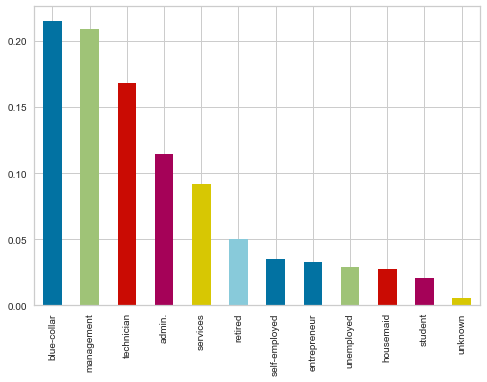


divorced    0.115220
married     0.601811
single      0.282968
Name: marital, dtype: float64


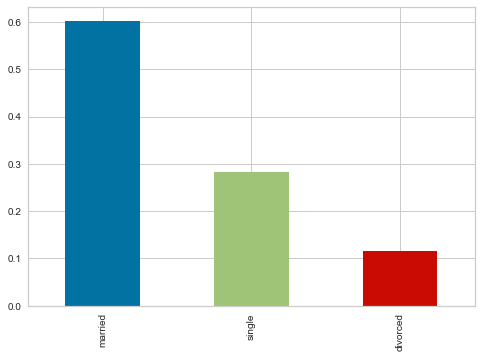


primary      0.151715
secondary    0.513807
tertiary     0.294550
unknown      0.039927
Name: education, dtype: float64


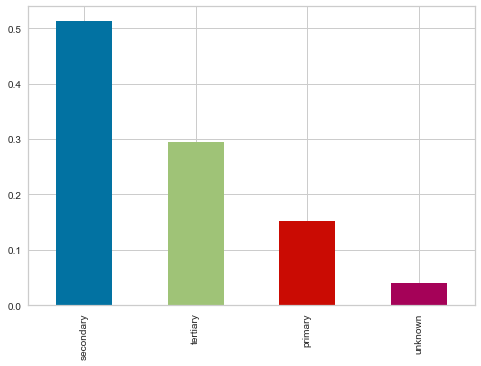


no     0.981974
yes    0.018026
Name: default, dtype: float64


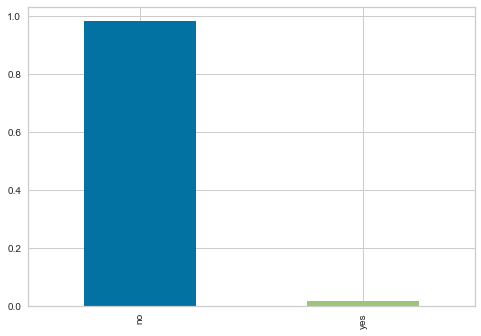


no     0.443608
yes    0.556392
Name: housing, dtype: float64


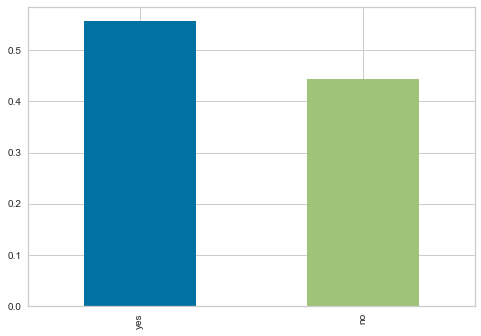


no     0.839582
yes    0.160418
Name: loan, dtype: float64


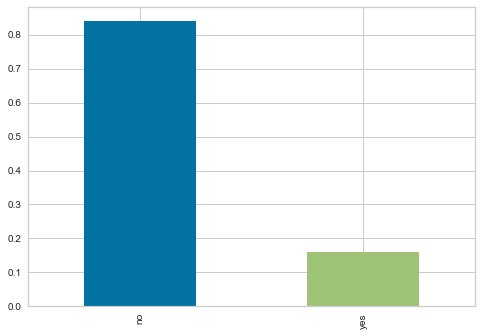


cellular     0.648515
telephone    0.064353
unknown      0.287132
Name: contact, dtype: float64


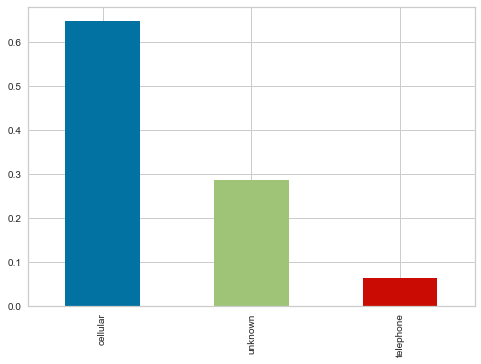


apr    0.064929
aug    0.138340
dec    0.004739
feb    0.058662
jan    0.031069
jul    0.152690
jun    0.117368
mar    0.010563
may    0.304604
nov    0.087893
oct    0.016321
sep    0.012822
Name: month, dtype: float64


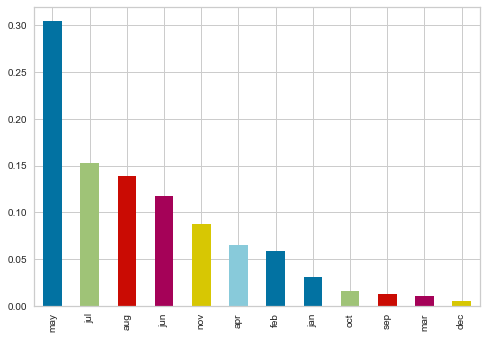


failure    0.108532
other      0.040747
success    0.033461
unknown    0.817260
Name: poutcome, dtype: float64


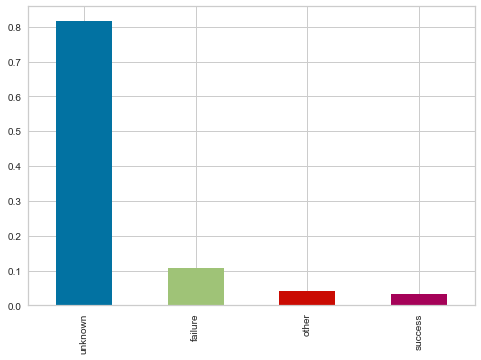


no     0.882897
yes    0.117103
Name: Target, dtype: float64


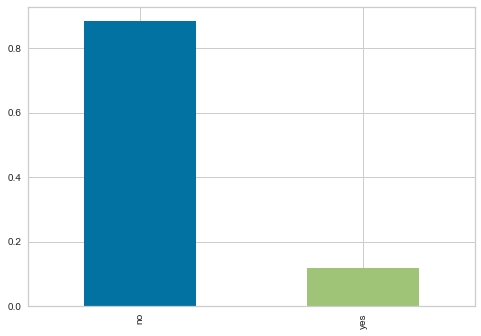

In [24]:
for i in list(df_bank.columns[df_bank.dtypes=='category']):   # checking value counts of all object type columns
    print(df_bank[i].value_counts(normalize=True).sort_index())
    df_bank[i].value_counts(normalize=True).plot(kind='bar')
    plt.show()
    print()

### Bi-variate analysis

#### Duration vs Target 

In [25]:
### Lets try to see if duration can be binned whether it is helpul to get some insight 
df_bank[(df_bank['duration'] > 643) & (df_bank['Target'] == 'yes' ) ].shape[0]/df_bank [ df_bank['Target'] == 'yes' ].shape[0]

0.3122163388804841

#### Data Insight - Duration vs Target
Customer who has accepted the Term deposit and they are considered to be outliers when duration is considered, it constitute 31% of the total customer accepted Term deposit

#### Campaign vs Target 

In [26]:
df_bank[(df_bank['campaign'] > 6) & (df_bank['Target'] == 'yes' ) ].shape[0]/df_bank [ df_bank['Target'] == 'yes' ].shape[0]

0.03044629349470499

#### Data Insight - Campaign vs Target
Customer who has accepted the Term deposit and they are considered to be outliers when capaign is considered, it constitute 3% of the total customer accepted Term deposit.This is quite a few number. So, it is better to keep it rather than performing any outlier remediation.

#### Balance vs Term Deposit

In [27]:
#### whether customer having negative balance was offered term deposit and if yes then how many of them have opted in for it.
df_bank[df_bank['balance'] < 0].groupby(['default','Target'])['job'].count()

default  Target
no       no        3144
         yes        182
yes      no         412
         yes         28
Name: job, dtype: int64

In [28]:
df_bank[df_bank['balance'] < 0].groupby(['default','Target'])['job'].count()/df_bank[df_bank['balance'] < 0].shape[0]

default  Target
no       no        0.834838
         yes       0.048327
yes      no        0.109400
         yes       0.007435
Name: job, dtype: float64

#### Data insight :- Debtor vs Term Deposit
Customer who owes to the bank and has defaulted is 440 and accepted the Term loan is 28. This constitutes around 0.7 percentage total customer whose balance is less than 0 . Around 83% are such customer whose balance is less than 0 and has not defaulted and did not accepted the term deposit. 

#### Observing the duration lets try to see if binning them help in getting better insight when mapping with target variable 

In [29]:
#Create a bin size with custom define bin size
duration_bin = [0,60,300,600,1200,1800,3600,5400]
duration_bin_lbl = ['less than min','1 - 5 min','5 - 10 min', '10 - 20 min', '20 - 30 min', '30 - 60 min', '60 - 90 min']

df_bank['duration_bin_in_min'] = pd.cut(df_bank.duration,duration_bin, labels = duration_bin_lbl,include_lowest=True)

df_bank[df_bank['duration_bin_in_min'].isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int,duration_bin_in_min


<AxesSubplot:xlabel='duration_bin_in_min', ylabel='count'>

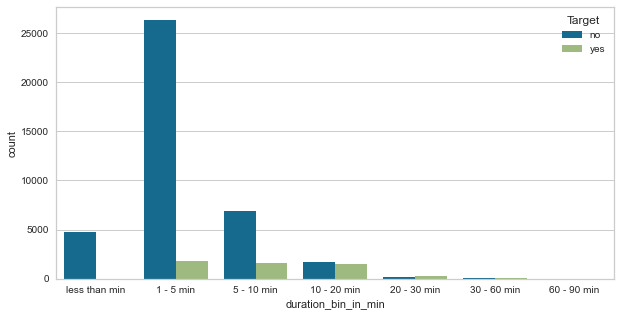

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'duration_bin_in_min' , hue = 'Target' , data = df_bank)

In [31]:
df_bank['duration_bin_in_min'].value_counts(normalize =True)

1 - 5 min        0.623292
5 - 10 min       0.187612
less than min    0.105233
10 - 20 min      0.071462
20 - 30 min      0.010032
30 - 60 min      0.002303
60 - 90 min      0.000066
Name: duration_bin_in_min, dtype: float64

In [32]:
# Looking at the above plot, change the bin as below 
# Redifining the bin size for the duration 
duration_bin = [0,60,300,600,5400]
duration_bin_lbl = ['less than min','1 - 5 min','5 - 10 min', '10 - 90 min']
df_bank['duration_bin_in_min'] = pd.cut(df_bank.duration,duration_bin, labels = duration_bin_lbl,include_lowest=True)

df_bank[df_bank['duration_bin_in_min'].isnull()]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int,duration_bin_in_min


<AxesSubplot:xlabel='duration_bin_in_min', ylabel='count'>

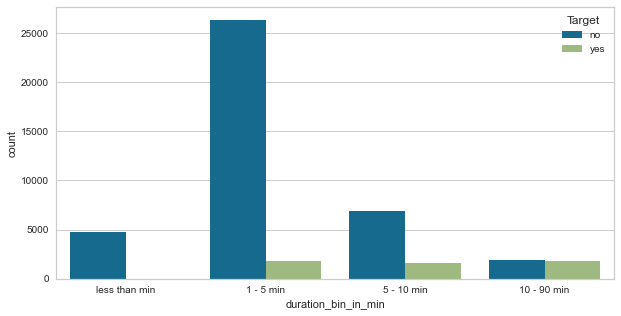

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'duration_bin_in_min' , hue = 'Target' , data = df_bank)

In [34]:
df_bank['duration_bin_in_min'].value_counts(normalize =True)

1 - 5 min        0.623292
5 - 10 min       0.187612
less than min    0.105233
10 - 90 min      0.083863
Name: duration_bin_in_min, dtype: float64

#### Data Insight
Continious variable "duration" with the help of binning has been changed into categorical variable with logical grouping and distribution. Less than 10 min duration is contributing towards around 92 percentage of the volume. Out of that between 1 min and 5 min is contributing 62 percentage.

Though the greater than 10 min of duration volume is just around 8.4 percentage, but the Term deposit rate is higher and can be looked into more detail when bi variate analysis is done.

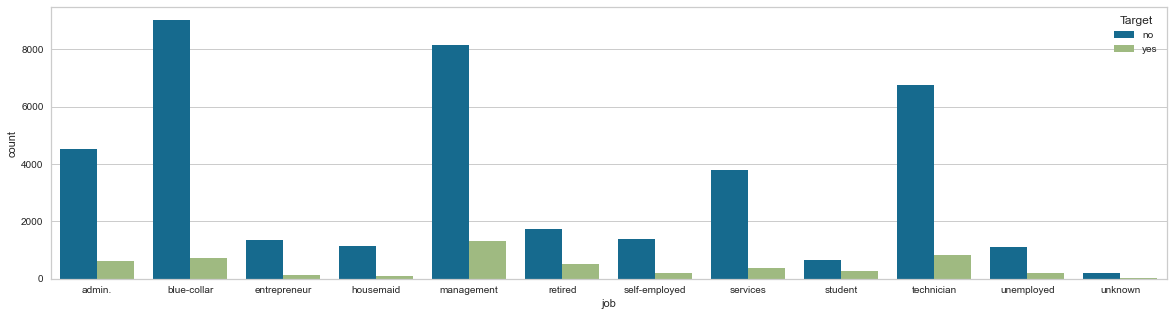

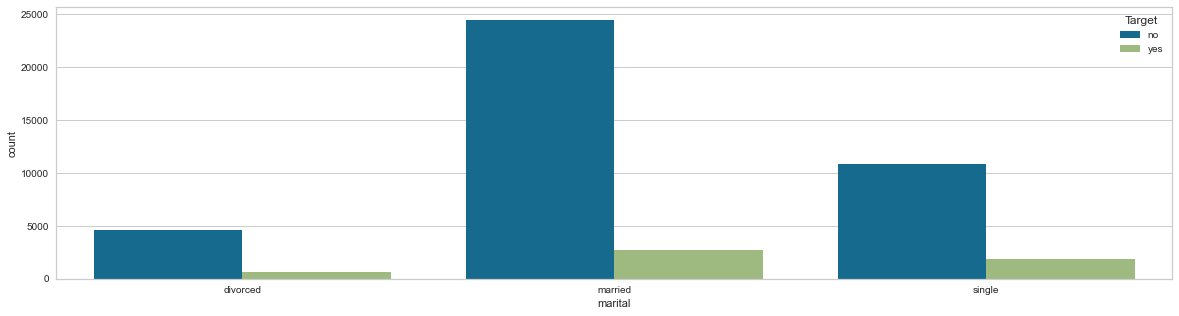

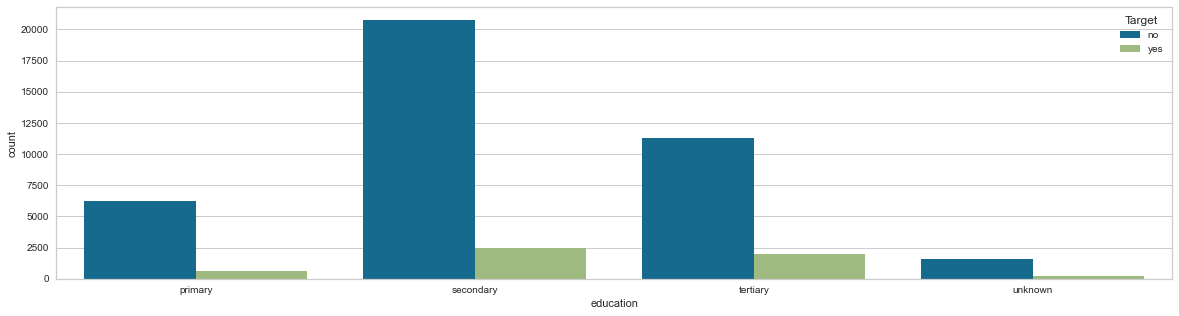

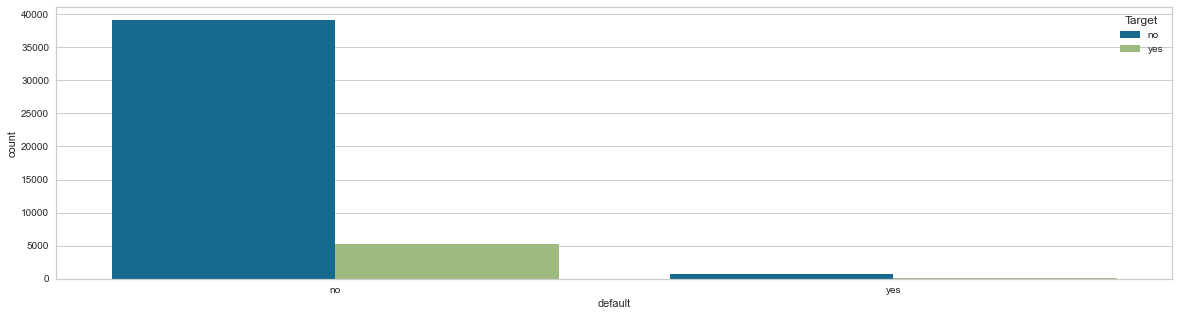

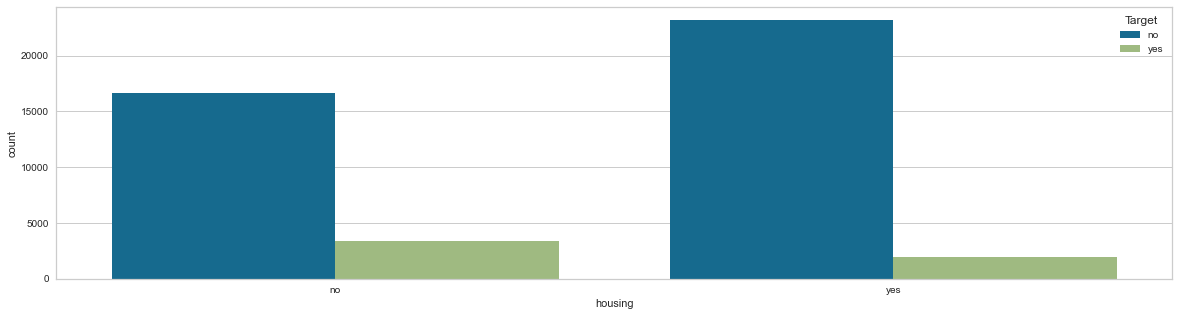

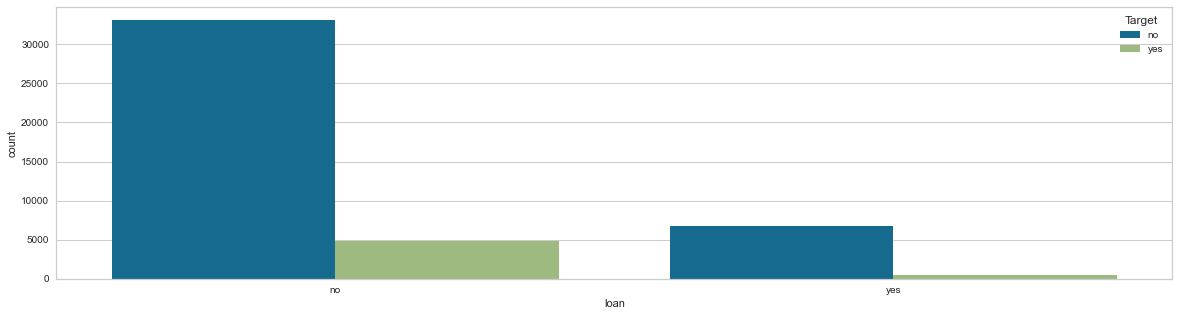

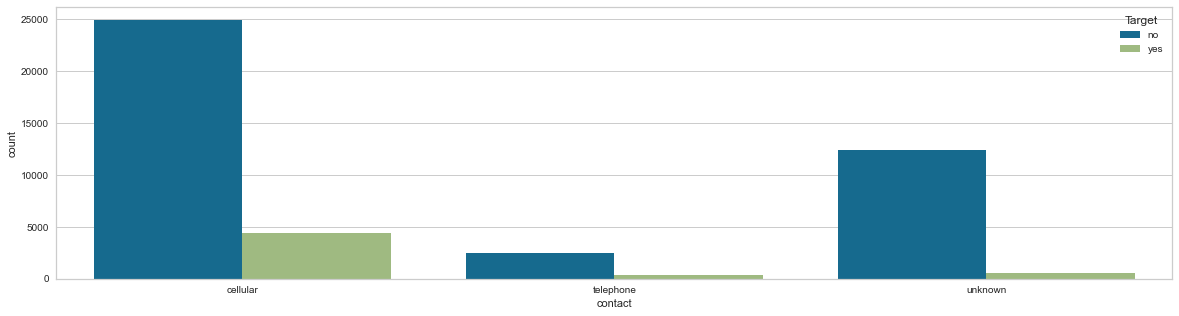

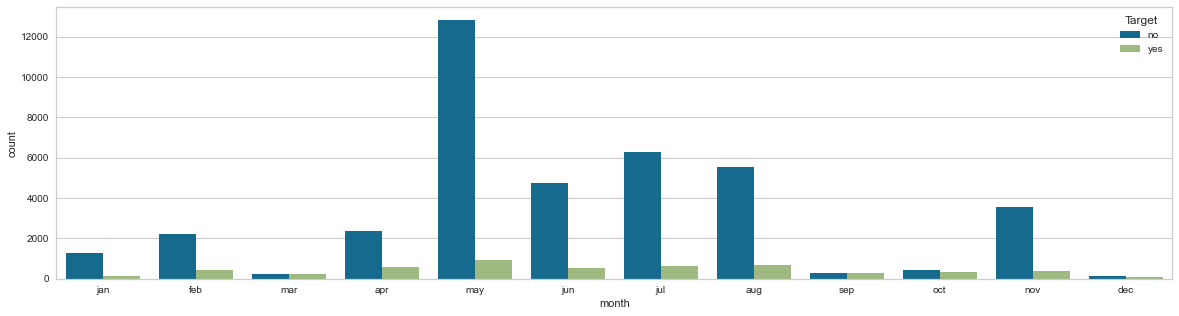

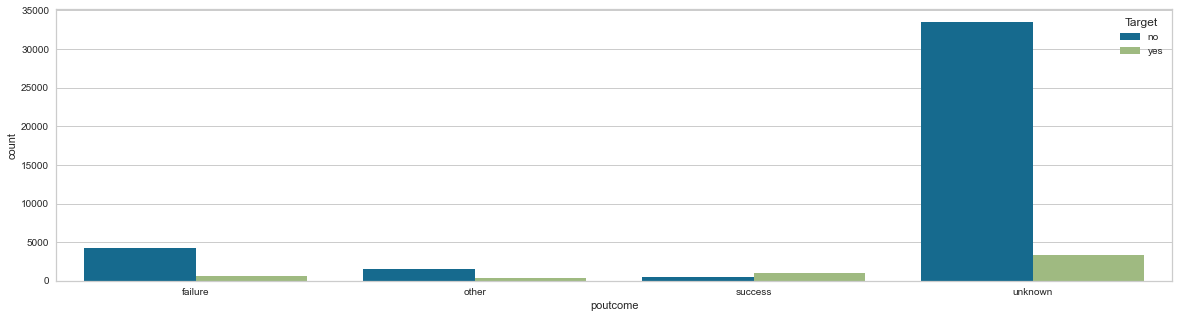

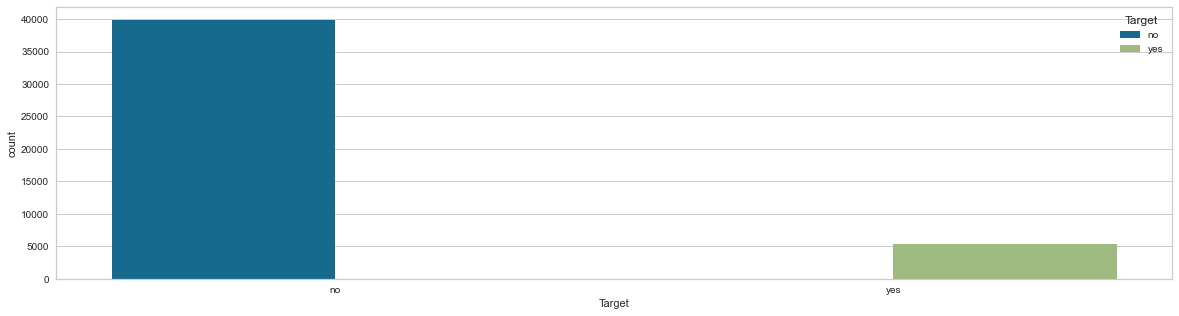

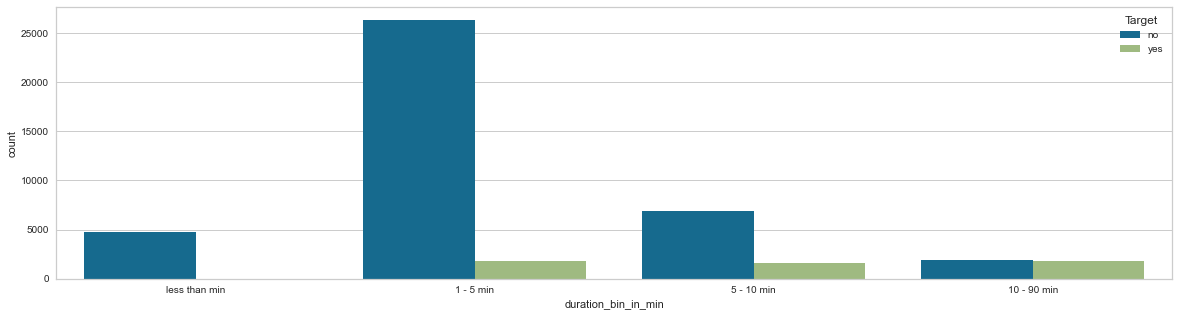

In [35]:
#Plotting the value counts of all the categorical variable using seaborn with hue as target field "Target"
for ind in df_bank.select_dtypes(include='category').columns:
    plt.figure(figsize = (20,5))
    if ind == 'month':
        sns.countplot(x = ind, data = df_bank , hue = "Target", order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
    else:
        sns.countplot(x = ind, data = df_bank , hue = "Target")
    plt.show()

### Data Insight - Mapping between categorical variable and output variable "target" 
Looking at the count plot using both seaborn and pandas

- default field can be dropped as majority of the population is where they have not defaulted 
- poutcome variable may be also dropped since the majority falls in the unknown category. How when this variable is grouped with target variable "Target" and find out what is population where poutcome is either "failure" or "success" and "Target" is "Yes" 


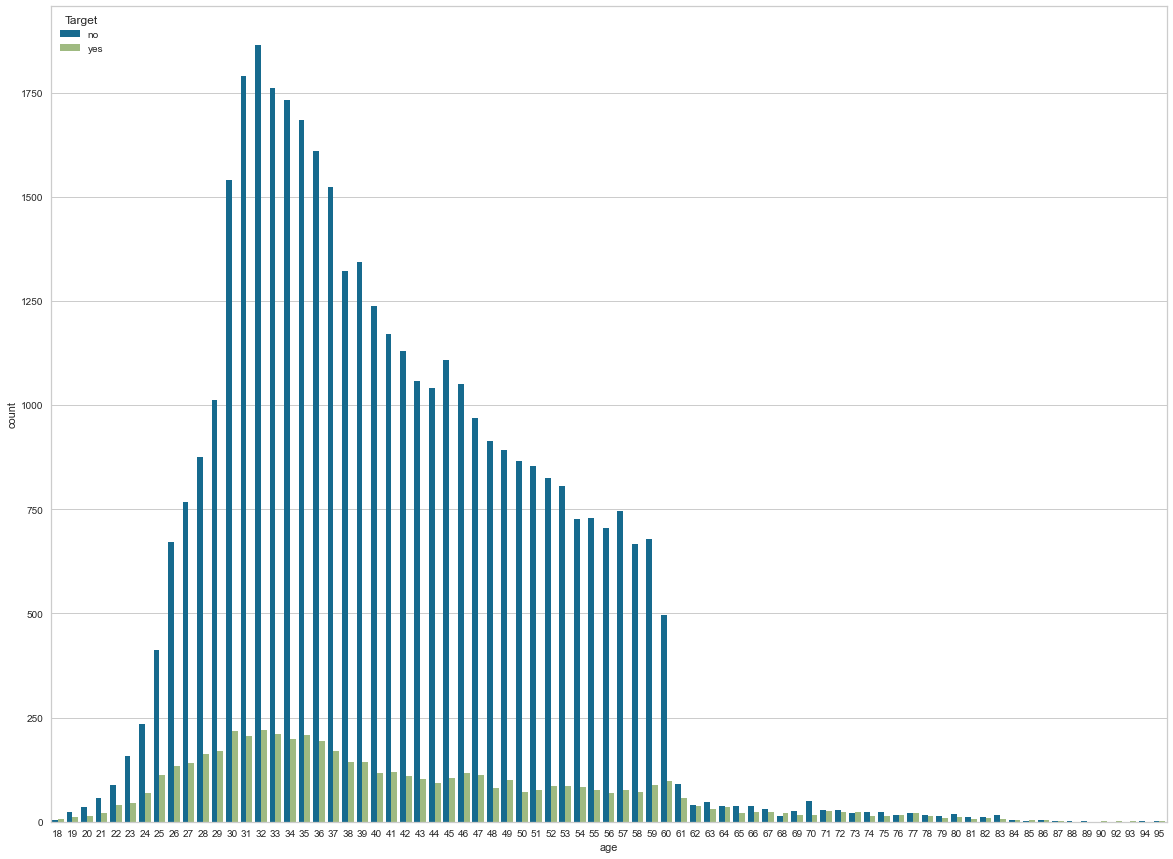

In [36]:
# Count plot "age" vs target variable "Target"
plt.figure(figsize = (20,15))
sns.countplot(x = 'age', data = df_bank , hue = "Target");

### Data Insight 
Looking at the Count plot of the age having hue as "target", we can divide age category as below 
1. Below 21
2. Between 21 and 30 
3. Between 31 and 40 
4. Between 41 and 50 
5. Between 51 and 60
6. Above 60


In [37]:
# Binning the "age" field with 10 years of difference and going upto the max of the age in the dataset
age_bins =  np.arange(0,df_bank['age'].max() + 10, 10)
age_bins_lbl = ['Between ' + str(x) + ' and ' + str(y) for x, y in zip(age_bins[:-1], age_bins[1:])]
df_bank['age_bins'] = pd.cut(df_bank.age,age_bins,labels=age_bins_lbl)
df_bank[df_bank['age_bins'] == np.nan]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int,duration_bin_in_min,age_bins


<AxesSubplot:xlabel='age_bins', ylabel='count'>

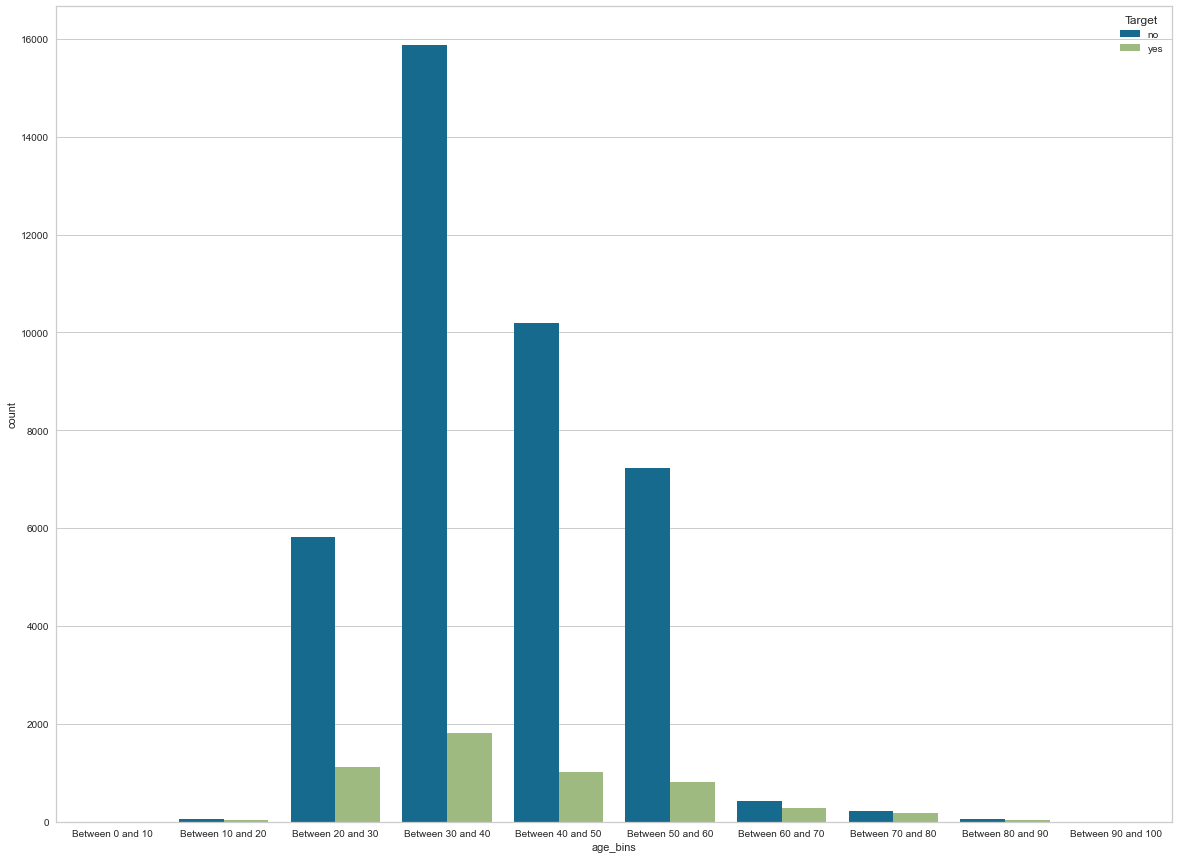

In [38]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'age_bins', data = df_bank , hue = "Target")

In [39]:
# Value counts to get the normalized value
df_bank['age_bins'].value_counts(normalize =True)

Between 30 and 40     0.391523
Between 40 and 50     0.248400
Between 50 and 60     0.178134
Between 20 and 30     0.153487
Between 60 and 70     0.015524
Between 70 and 80     0.008592
Between 10 and 20     0.002148
Between 80 and 90     0.002037
Between 90 and 100    0.000155
Between 0 and 10      0.000000
Name: age_bins, dtype: float64

In [40]:
# From the above, the bin size can be changed 
age_bins =  [0,30,40,50,100]
age_bins_lbl = ['Between 0 and 30', 'Between 30 and 40','Between 40 and 50','Between 50 and 100']
df_bank['age_bins'] = pd.cut(df_bank.age,age_bins,labels=age_bins_lbl)
df_bank[df_bank['age_bins'] == np.nan]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int,duration_bin_in_min,age_bins


In [41]:
df_bank['age_bins'].value_counts(normalize =True)

Between 30 and 40     0.391523
Between 40 and 50     0.248400
Between 50 and 100    0.204442
Between 0 and 30      0.155635
Name: age_bins, dtype: float64

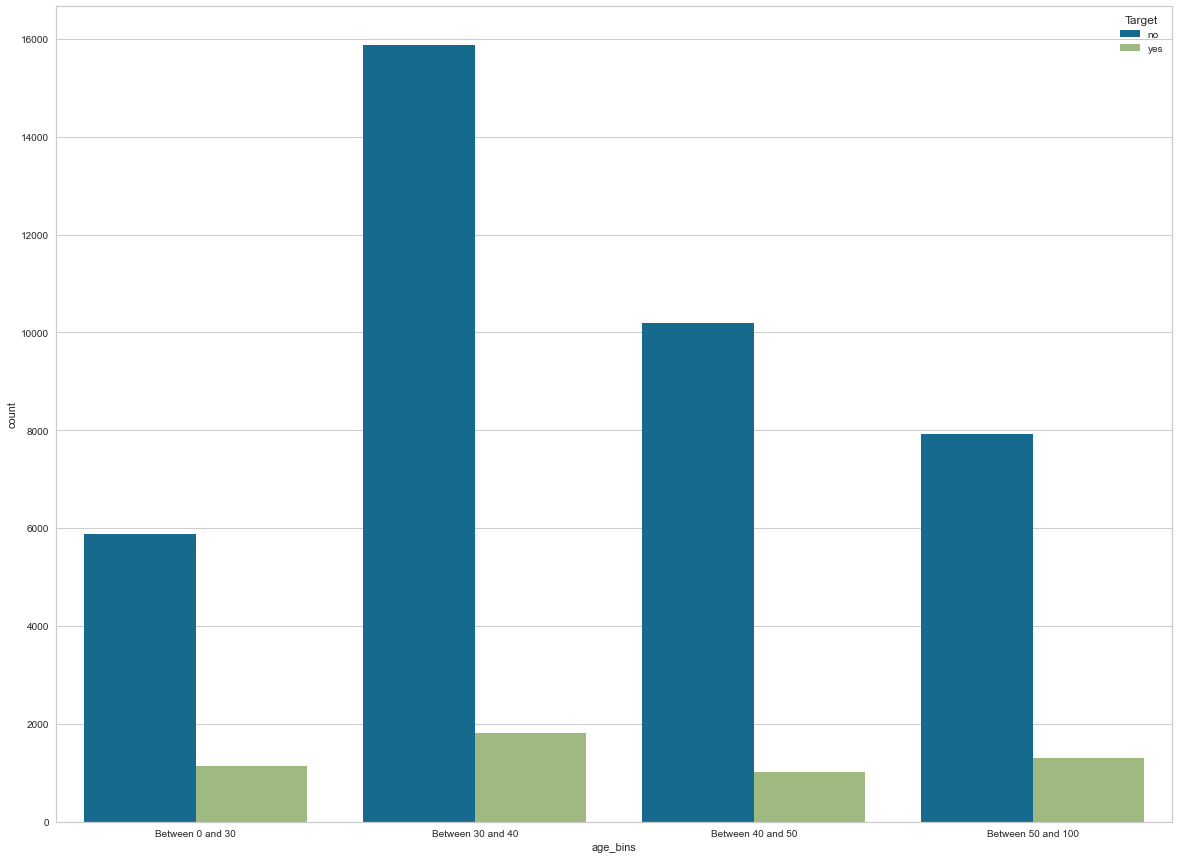

In [42]:
plt.figure(figsize = (20,15))
sns.countplot(x = 'age_bins', data = df_bank , hue = "Target");

<AxesSubplot:>

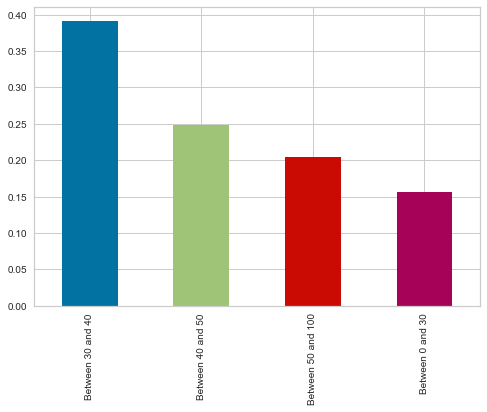

In [43]:
df_bank['age_bins'].value_counts(normalize=True).plot(kind='bar')

### Data Insight - Age vs Target
Continious variable "age" with the help of binning has been changed into categorical variable with logical grouping and distribution. This is going to help more in determining which age group to focus instead of targeting individual age. 

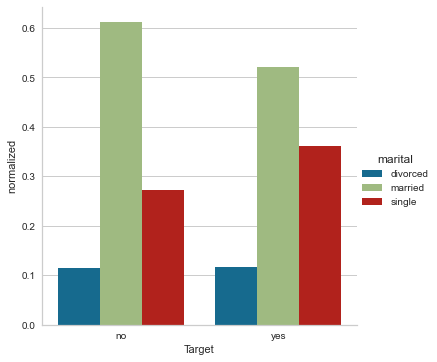

In [44]:
df_bank_mart = df_bank.groupby(['marital','Target']).size().reset_index(name = 'mart_target_cnt').sort_values(by='Target')
a = df_bank_mart.groupby('Target')['mart_target_cnt'].transform(sum)
df_bank_mart['normalized'] = df_bank_mart['mart_target_cnt'].div(a)
sns.catplot(kind='bar', x = 'Target' , y = 'normalized' , hue = 'marital', data = df_bank_mart)

### Data Insight - Marital vs Target
- There seems to have impact of martial where married and single seems to have impact more as compared to divorced


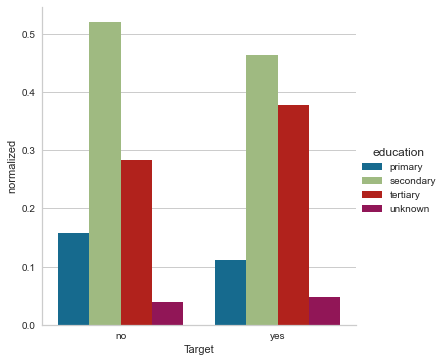

In [45]:
df_bank_edu = df_bank.groupby(['education','Target']).size().reset_index(name = 'edu_target_cnt').sort_values(by='Target')
a = df_bank_edu.groupby('Target')['edu_target_cnt'].transform(sum)
df_bank_edu['normalized'] = df_bank_edu['edu_target_cnt'].div(a)
sns.catplot(kind='bar', x = 'Target' , y = 'normalized' , hue = 'education', data = df_bank_edu)

### Data Insight - Education vs Target
- There seems to have impact of education where customer having secondary and teritary education seems to have impact more as compared to other

In [46]:
df_bank_def = df_bank.groupby(['default','Target']).size().reset_index(name = 'def_target_cnt').sort_values(by='Target')
a = df_bank_def.groupby('Target')['def_target_cnt'].transform(sum)
df_bank_def['normalized'] = df_bank_def['def_target_cnt'].div(a)
df_bank_def

,default,Target,def_target_cnt,normalized
0,no,no,39107,0.980887
2,yes,no,762,0.019113
1,no,yes,5236,0.990166
3,yes,yes,52,0.009834


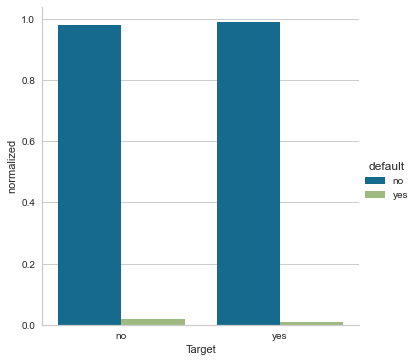

In [47]:
sns.catplot(kind='bar', x = 'Target' , y = 'normalized' , hue = 'default', data = df_bank_def)

### Data Insight - Default vs Target
- Default as "No" contributes towards towards 98 and 99 percentage respectively which is almost everything and can be removed

In [48]:
df_bank_hou = df_bank.groupby(['housing','Target']).size().reset_index(name = 'hou_target_cnt').sort_values(by='Target')
a = df_bank_hou.groupby('Target')['hou_target_cnt'].transform(sum)
df_bank_hou['normalized'] = df_bank_hou['hou_target_cnt'].div(a)
df_bank_hou

,housing,Target,hou_target_cnt,normalized
0,no,no,16679,0.418345
2,yes,no,23190,0.581655
1,no,yes,3353,0.634077
3,yes,yes,1935,0.365923


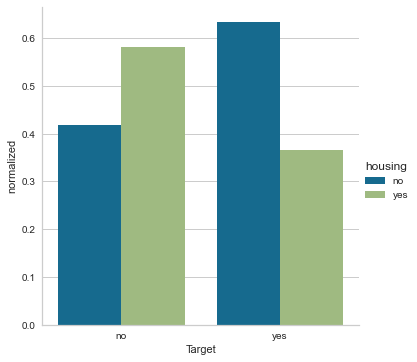

In [49]:
sns.catplot(kind='bar', x = 'Target' , y = 'normalized' , hue = 'housing', data = df_bank_hou)

### Data Insight - Housing vs Target
- Customer with no housing looks to be availing Term Deposit more. 

In [50]:
df_bank_loan = df_bank.groupby(['loan','Target']).size().reset_index(name = 'loan_target_cnt').sort_values(by='Target')
a = df_bank_loan.groupby('Target')['loan_target_cnt'].transform(sum)
df_bank_loan['normalized'] = df_bank_loan['loan_target_cnt'].div(a)
df_bank_loan

,loan,Target,loan_target_cnt,normalized
0,no,no,33109,0.830445
2,yes,no,6760,0.169555
1,no,yes,4804,0.908472
3,yes,yes,484,0.091528


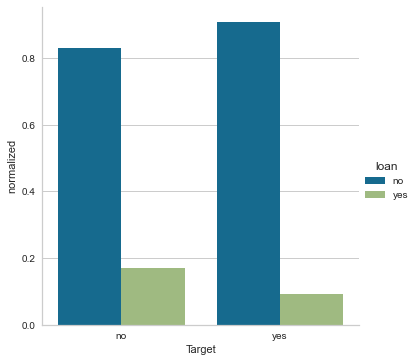

In [51]:
sns.catplot(kind='bar', x = 'Target' , y = 'normalized' , hue = 'loan', data = df_bank_loan)

### Data Insight - Loan Vs Target 
- Customer who said "No" to Term Loan, 83 percentage customer dont have loan
- Customer who said "Yes" to Term Loan, 90 percentage customer dont have loan

There is high degree of relationship, so will keep the Loan as independent variable 

In [52]:
df_bank_cntct = df_bank.groupby(['contact','Target']).size().reset_index(name = 'contact_target_cnt').sort_values(by='Target')
a = df_bank_cntct.groupby('Target')['contact_target_cnt'].transform(sum)
df_bank_cntct['normalized'] = df_bank_cntct['contact_target_cnt'].div(a)
df_bank_cntct

,contact,Target,contact_target_cnt,normalized
0,cellular,no,24916,0.624947
2,telephone,no,2516,0.063107
4,unknown,no,12437,0.311947
1,cellular,yes,4369,0.826210
3,telephone,yes,390,0.073752
5,unknown,yes,529,0.100038


### Data Insight - Contact vs Target
- Who ever has cellular phone, they tend to opt for the term loan more as compard to other channel

In [53]:
df_bank_outcome = df_bank.groupby(['poutcome','Target']).size().reset_index(name = 'outcome_target_cnt').sort_values(by='Target')
a = df_bank_outcome.groupby('poutcome')['outcome_target_cnt'].transform(sum)
df_bank_outcome['normalized'] = df_bank_outcome['outcome_target_cnt'].div(a)
df_bank_outcome

,poutcome,Target,outcome_target_cnt,normalized
0,failure,no,4283,0.873903
2,other,no,1533,0.833152
4,success,no,533,0.352747
6,unknown,no,33520,0.908278
1,failure,yes,618,0.126097
3,other,yes,307,0.166848
5,success,yes,978,0.647253
7,unknown,yes,3385,0.091722


### Working with Unknown value 
- Job       as "unknown"
- education as "unknown"

In [54]:
df_bank[df_bank['job'] == 'unknown'].groupby(['age_bins']).size().sort_values()

age_bins
Between 0 and 30      17
Between 30 and 40     44
Between 40 and 50     81
Between 50 and 100    92
dtype: int64

#### Find out for these age bins what is the distriution of the job and in the event it is distributed highly towards one of the job then replace unknown value with that job

In [55]:
df_bank[(df_bank['age_bins'] == 'Between 50 and 100')].groupby('job').size().sort_values()

job
student             0
unknown            92
unemployed        275
self-employed     301
entrepreneur      324
housemaid         481
services          556
admin.            778
technician       1107
blue-collar      1500
management       1706
retired          2112
dtype: int64

In [56]:
df_bank[(df_bank['age_bins'] == 'Between 40 and 50')].groupby('job').size().sort_values()

job
student            10
unknown            81
retired           112
unemployed        349
housemaid         360
self-employed     404
entrepreneur      469
services         1031
admin.           1297
technician       1891
management       2383
blue-collar      2830
dtype: int64

In [57]:
df_bank[(df_bank['age_bins'] == 'Between 30 and 40')].groupby('job').size().sort_values()

job
retired            36
unknown            44
student           159
housemaid         332
unemployed        476
entrepreneur      559
self-employed     626
services         1745
admin.           2130
technician       3443
blue-collar      3964
management       4166
dtype: int64

In [58]:
df_bank[(df_bank['age_bins'] == 'Between 0 and 30')].groupby('job').size().sort_values()

job
retired             4
unknown            17
housemaid          67
entrepreneur      135
unemployed        203
self-employed     248
student           769
services          822
admin.            966
technician       1156
management       1203
blue-collar      1438
dtype: int64

### Data Insight - Unknown Job
After analysis there is not one job against which it is distributed highly towards it. So, keeping the unknowns as is for job.


In [59]:
edu_unknown = df_bank[df_bank['education'] == 'unknown'].groupby(['age_bins','job']).size().reset_index(name = 'Count')

In [60]:
df_edu_unknown = pd.DataFrame(columns = {'age_bins','job','education'})
for i, row in edu_unknown.iterrows():
    #print(row[0],row[1] )
    edu_unknown_temp = df_bank[(df_bank['age_bins'] == row[0]) & (df_bank['job'] == row[1])].groupby('education').size().sort_values(ascending=False).reset_index()
    to_be_replaced_with = edu_unknown_temp.loc[0,'education']
    df_edu_unknown = df_edu_unknown.append({'age_bins':row[0],'job':row[1],'education':to_be_replaced_with},ignore_index=True)
    #print(df_bank[(df_bank['age_bins'] == row[0]) & (df_bank['job'] == row[1]) & (df_bank['education'] == 'unkown')]  )
    

#df_bank[(df_bank['age_bins'] == 'Between 0 and 30') & (df_bank['job'] == 'admin.')]
df_edu_unknown

,job,age_bins,education
0,admin.,Between 0 and 30,secondary
1,blue-collar,Between 0 and 30,secondary
2,entrepreneur,Between 0 and 30,tertiary
3,management,Between 0 and 30,tertiary
4,self-employed,Between 0 and 30,tertiary
5,services,Between 0 and 30,secondary
6,student,Between 0 and 30,secondary
7,technician,Between 0 and 30,secondary
8,unemployed,Between 0 and 30,secondary
9,unknown,Between 0 and 30,secondary


In [61]:
df_bank[(df_bank['education'] == 'unknown')].shape[0]

1803

## Note :- 
Age Bins, Job and Education value needs to be mapped everytime df_edu_unknown is getting iterated as the postion of the fields changes in the dataframe df_edu_unknown

In [62]:
for inx, rows in df_edu_unknown.iterrows():
    print("Age Group is %s and job is %s"%(rows[1],rows[0]))
    print("To be replaced with ",((rows[2].strip())))
    if row[0] != 'unknown':
        print("Replacing")
        indx_list = df_bank[(df_bank['education'] == 'unknown') & ( df_bank['age_bins'] == rows[1] ) & ( df_bank['job'] == rows[0] )].index.values.tolist()
        print(len(indx_list))
        print(indx_list)
        df_bank.loc[indx_list,'education'] = rows[2]

Age Group is Between 0 and 30 and job is admin.
To be replaced with  secondary
Replacing
18
[1638, 1665, 4000, 6279, 6830, 8670, 9288, 13125, 15143, 15443, 16187, 17520, 25911, 32271, 34371, 39591, 43911, 44900]
Age Group is Between 0 and 30 and job is blue-collar
To be replaced with  secondary
Replacing
37
[1358, 2113, 2417, 2523, 2555, 3795, 4205, 4272, 4691, 5132, 5451, 6474, 6700, 6712, 6879, 7122, 7550, 8554, 8783, 8930, 12378, 14797, 15253, 16410, 18632, 32274, 32620, 33197, 33715, 35059, 37697, 38438, 39086, 39087, 39105, 39219, 39701]
Age Group is Between 0 and 30 and job is entrepreneur
To be replaced with  tertiary
Replacing
5
[4216, 13132, 15563, 28374, 34811]
Age Group is Between 0 and 30 and job is management
To be replaced with  tertiary
Replacing
15
[1814, 2004, 7809, 9452, 13129, 13255, 30995, 32065, 39580, 39880, 41590, 42904, 42946, 43415, 44083]
Age Group is Between 0 and 30 and job is self-employed
To be replaced with  tertiary
Replacing
8
[16525, 28656, 31005, 3905

In [63]:
df_bank[df_bank['education'] == 'unknown'].shape[0]

72

In [64]:
df_bank[df_bank['education'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int,duration_bin_in_min,age_bins
10968,42,student,married,unknown,no,2374,no,no,unknown,17,jun,158,2,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
12081,44,student,single,unknown,no,5078,no,no,unknown,20,jun,17,5,-1,0,unknown,no,0,less than min,Between 40 and 50
12750,46,unknown,married,unknown,no,2911,no,no,telephone,7,jul,41,9,-1,0,unknown,no,0,less than min,Between 40 and 50
14742,47,student,single,unknown,no,107,no,no,telephone,15,jul,119,8,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
16128,44,unknown,married,unknown,no,722,yes,no,telephone,22,jul,269,2,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
17704,51,unknown,married,unknown,no,2642,no,no,cellular,29,jul,52,6,-1,0,unknown,no,0,less than min,Between 50 and 100
17739,45,unknown,married,unknown,no,4413,no,no,telephone,29,jul,77,35,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
17845,56,unknown,married,unknown,no,1032,no,no,telephone,29,jul,225,4,-1,0,unknown,no,0,1 - 5 min,Between 50 and 100
17922,48,unknown,married,unknown,no,286,no,no,cellular,30,jul,166,2,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
18079,41,unknown,married,unknown,no,779,no,no,cellular,30,jul,647,10,-1,0,unknown,no,0,10 - 90 min,Between 40 and 50


### Data Insight
- After working with records where education is "unknown" and job is not "unknown", there are still 72 records where majority of the categorical variables are "unknown". These records can be dropped.

In [65]:
df_bank.drop(df_bank[df_bank['education'] == 'unknown'].index,inplace = True,axis = 0)
df_bank.reset_index(drop=True)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Target_Int,duration_bin_in_min,age_bins
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1 - 5 min,Between 50 and 100
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1 - 5 min,Between 30 and 40
3,47,blue-collar,married,primary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50
4,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,1 - 5 min,Between 30 and 40
5,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,1 - 5 min,Between 0 and 30
6,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0,5 - 10 min,Between 40 and 50
7,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0,less than min,Between 50 and 100
8,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0,less than min,Between 40 and 50
9,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no,0,1 - 5 min,Between 40 and 50


In [66]:
df_bank.shape

(45085, 20)

In [67]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45085 entries, 0 to 45210
Data columns (total 20 columns):
age                    45085 non-null int64
job                    45085 non-null category
marital                45085 non-null category
education              45085 non-null category
default                45085 non-null category
balance                45085 non-null int64
housing                45085 non-null category
loan                   45085 non-null category
contact                45085 non-null category
day                    45085 non-null int64
month                  45085 non-null category
duration               45085 non-null int64
campaign               45085 non-null int64
pdays                  45085 non-null int64
previous               45085 non-null int64
poutcome               45085 non-null category
Target                 45085 non-null category
Target_Int             45085 non-null int64
duration_bin_in_min    45085 non-null category
age_bins              

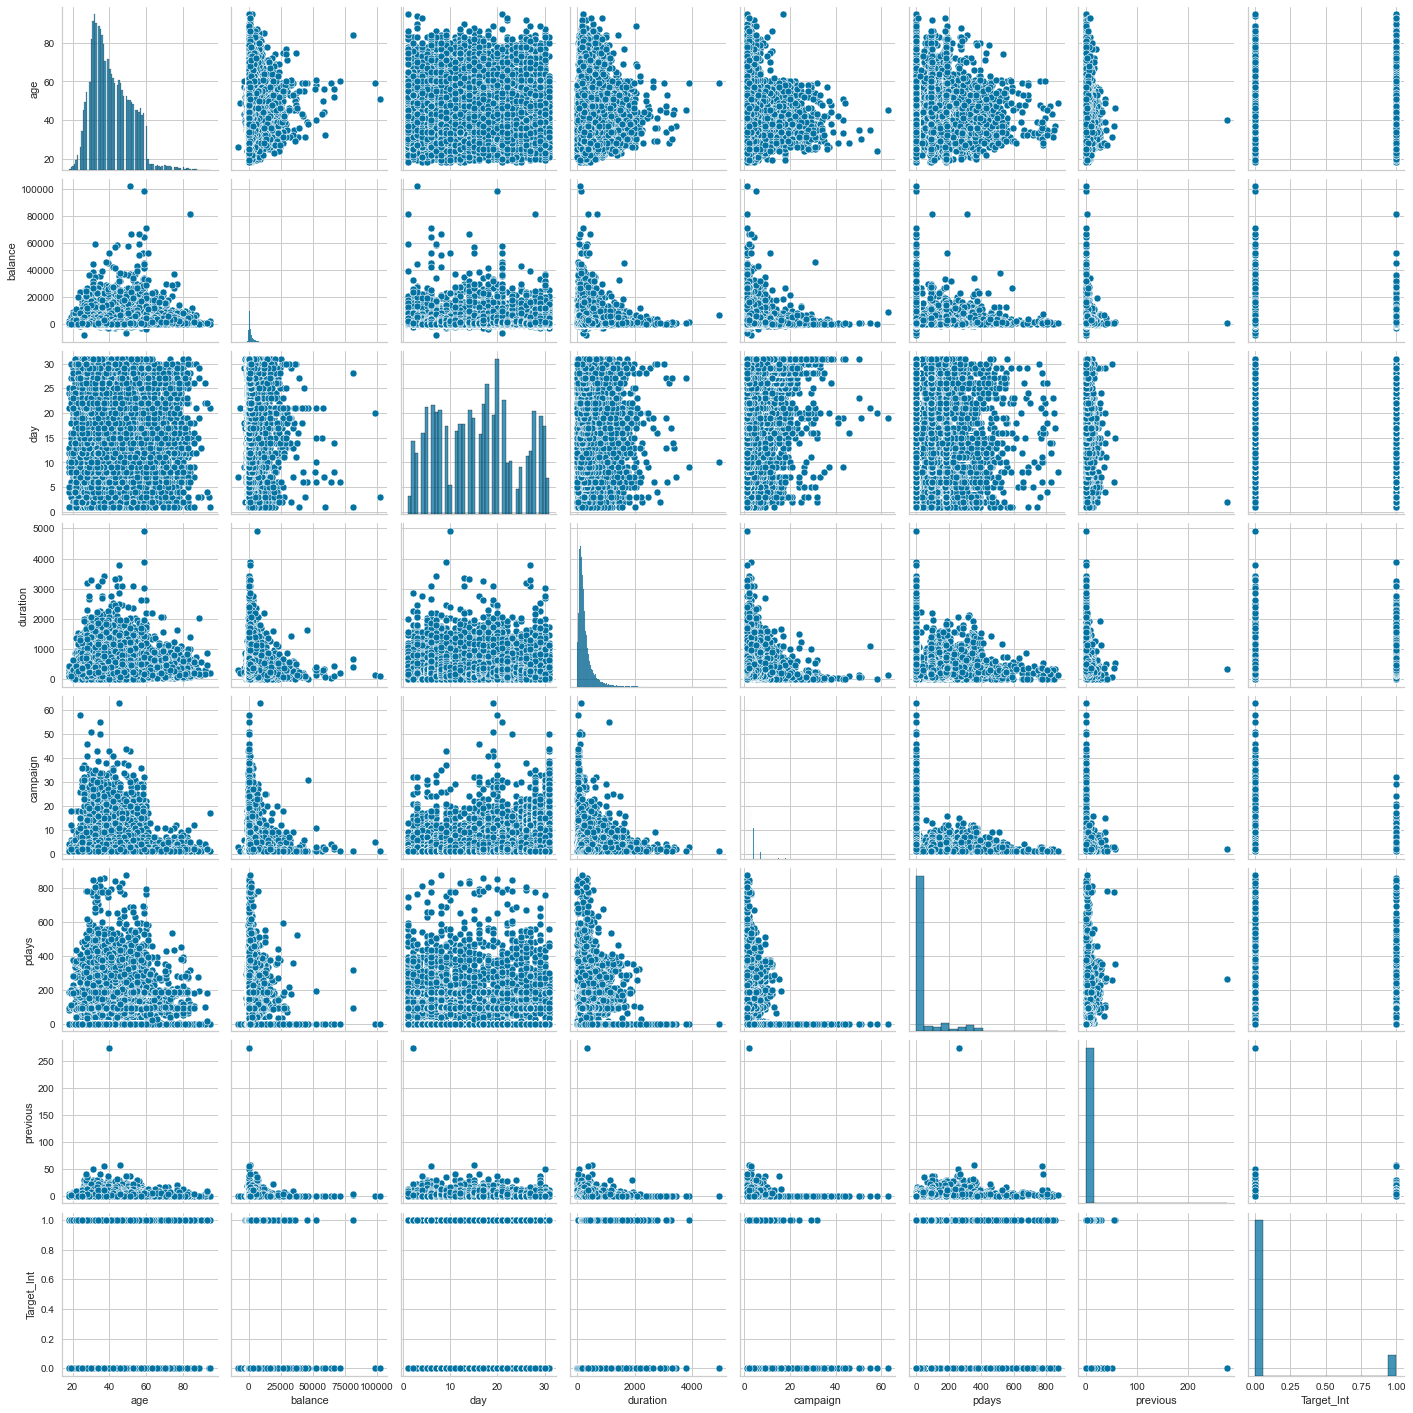

In [68]:
sns.pairplot(data = df_bank)

#### Data Insight
Pairplot do not show any correlation between any attribute which is of Integer data type

<AxesSubplot:>

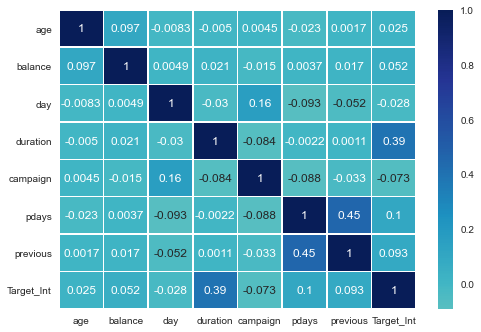

In [69]:
#Check with Seaborn heat map
sns.heatmap(df_bank.corr(),annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu")

### Data Insight :- Pairplot and Correlation HeatMap 
- Looking at the independent variable "previous" and "pdays" shows sign coorelation between them and therefore one of the field can be dropped when building the model. 

- Rest all the independent variables seems to be independent from one another. 

### Bivariate Analysis Summary vs "Target"

| Property Name      | Whether property contributes towards Model Build | 
|--------------------|--------------------------------------------------|
| age                |        True                                      |
| job                |        True                                      |
| marital            |        True                                      |
| education          |        True                                      |
| default            |        False                                     |
| balance            |        True                                      |
| housing            |        True                                      |
| loan               |        True                                      |
| contact            |        True                                      | 
| day                |        False                                     |
| month              |        False                                     |
| duration           |        True                                      |
| campaign           |        True                                      |
| pdays              |        True                                      |      
| previous           |        False                                     |
| poutcome           |        False                                     |

In [70]:
#Create a copy of the dataframe and drop the fields which are not required
df_bank_mdl = df_bank.copy()

In [71]:
df_bank_mdl.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target',
       'Target_Int', 'duration_bin_in_min', 'age_bins'], dtype=object)

In [72]:
### Dropping the fields if the bin has been created those fields. For Age and Duration bin has been created
### Dropping the fields which has been determined after univariate analysis that it is not required
### Dropping the Target variable and keeping Target Int variable as it Interger type
df_bank_mdl.drop(['age','duration','default','day','month','previous','poutcome','Target'],axis = 1 , inplace = True)

In [73]:
## Define X and Y variables
X = df_bank_mdl.drop(['Target_Int'], axis=1)
Y = df_bank_mdl['Target_Int']

In [74]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [75]:
X.columns.values

array(['balance', 'campaign', 'pdays', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown',
       'duration_bin_in_min_1 - 5 min', 'duration_bin_in_min_5 - 10 min',
       'duration_bin_in_min_10 - 90 min', 'age_bins_Between 30 and 40',
       'age_bins_Between 40 and 50', 'age_bins_Between 50 and 100'],
      dtype=object)

### Split into training and test set

In [76]:
##Split into training and test set into 70 and 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [77]:
log_bank = LogisticRegression(random_state=7)

# fit the model on train data
log_bank.fit(X_train, y_train)    

LogisticRegression(random_state=7)

In [78]:
y_predict = log_bank.predict(X_test)              # Predicting the target variable on test data

In [79]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed_Target_Term_Loan_Stat'] = y_test
z['Predicted_Target_Term_Loan_Stat'] = y_predict
z.head()

,balance,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,duration_bin_in_min_1 - 5 min,duration_bin_in_min_5 - 10 min,duration_bin_in_min_10 - 90 min,age_bins_Between 30 and 40,age_bins_Between 40 and 50,age_bins_Between 50 and 100,Observed_Target_Term_Loan_Stat,Predicted_Target_Term_Loan_Stat
39956,155,3,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32268,94,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
25629,800,6,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
32438,630,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
13942,-319,2,-1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [80]:
## function to get confusion matrix in a proper format
def draw_cnf_mat( actual, predicted ):
    cnf_mat = confusion_matrix( actual, predicted)
    fig, ax = plt.subplots(figsize=(11,7)) 
    ax.set_ylim([0,2])
    #akws = {"ha": 'left',"va": 'top'}
    sns.heatmap(cnf_mat, annot=True,  fmt= "d", xticklabels = [0,1] , yticklabels = [0,1] ,cmap="YlGnBu",linewidths= 1.5 , annot_kws={"size": 15} )
    #plt.xticks([0.5,1.5],labels=[1,0])
    #plt.yticks([0.5,1.5],labels=[1,0])
    plt.title('Confusion matrix')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.89
Testing accuracy 0.88

Confusion Matrix



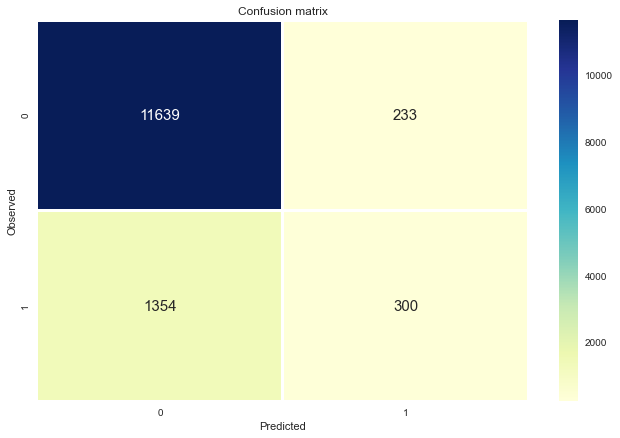


Recall: 0.18
Precision: 0.56
F1 Score: 0.27
Roc Auc Score: 0.58


In [81]:
print("Trainig accuracy",round(log_bank.score(X_train,y_train),2))  
print("Testing accuracy",round(log_bank.score(X_test, y_test),2))
print('\nConfusion Matrix\n')
draw_cnf_mat(y_test,y_predict);
print("\nRecall:",round(recall_score(y_test,y_predict),2))
print("Precision:",round(precision_score(y_test,y_predict),2))
print("F1 Score:",round(f1_score(y_test,y_predict),2))
print("Roc Auc Score:",round(roc_auc_score(y_test,y_predict),2))

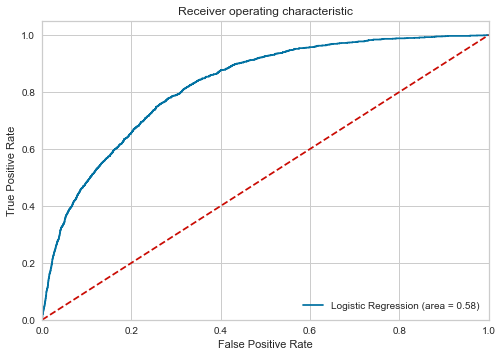

In [82]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, log_bank.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_bank.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Logistic Regression Hyperparameter Optimization 

#### Optimization of Solver

In [83]:
# all solver can be used with penaty as "l2" , only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score = []
test_score  = []

solver = ['liblinear','saga','newton-cg','lbfgs','sag']

for i in solver:
    bank_mdl = LogisticRegression(random_state = 42,penalty='l2', C = 0.75,solver = i)  # changing values of solver
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train, y_train),3))
    test_score.append(round(bank_mdl.score(X_test, y_test),3))
    
print("Solver list is                           :  ",solver)
print("\nTraining Score against respective solver :  ",train_score)
print("\nTesting Score against respective solver  :  ",test_score)

Solver list is                           :   ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag']

Training Score against respective solver :   [0.891, 0.772, 0.891, 0.891, 0.786]

Testing Score against respective solver  :   [0.883, 0.765, 0.883, 0.883, 0.779]


In [84]:
train_score = []
test_score =  []

solver = ['liblinear','saga']   # changing values of solver which works with 'l1'


for i in solver:
    bank_mdl = LogisticRegression(random_state = 42,penalty = 'l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train, y_train),3))
    test_score.append(round(bank_mdl.score(X_test, y_test),3))
    
print("Solver list is                           :  ",solver)
print("\nTraining Score against respective solver :  ",train_score)
print("\nTesting Score against respective solver  :  ",test_score)

Solver list is                           :   ['liblinear', 'saga']

Training Score against respective solver :   [0.891, 0.772]

Testing Score against respective solver  :   [0.883, 0.765]


### Data Insight 
- Among all the solver Liblinear is performing well as compared to other solver

#### Optimization of class_weight

In [85]:
bank_mdl = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

bank_mdl.fit(X_train, y_train) 

y_predict = bank_mdl.predict(X_test)     

print("Trainig accuracy",bank_mdl.score(X_train,y_train),"\n")  
print("Testing accuracy",bank_mdl.score(X_test, y_test))

Trainig accuracy 0.7890934440254761 

Testing accuracy 0.7889250332692592


#### Optimization of C with Class Weight as Balanced

In [86]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    bank_mdl = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(bank_mdl.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print("Trainig Score",train_score)
print("Testing Score",test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
Trainig Score [0.793, 0.79, 0.789, 0.789, 0.789, 0.789]
Testing Score [0.795, 0.791, 0.79, 0.789, 0.789, 0.789]


#### Optimization of C without Class Weight as Balanced

In [87]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    bank_mdl = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    bank_mdl.fit(X_train, y_train) 
    y_predict = bank_mdl.predict(X_test)     
    train_score.append(round(bank_mdl.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(bank_mdl.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print("Trainig Score",train_score)
print("Testing Score",test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
Trainig Score [0.89, 0.891, 0.891, 0.891, 0.891, 0.891]
Testing Score [0.88, 0.882, 0.883, 0.883, 0.883, 0.883]


### Optimized Logistic Regression

Trainig accuracy 0.8913146804398111
Testing accuracy 0.8827443442259353
Confusion Matrix


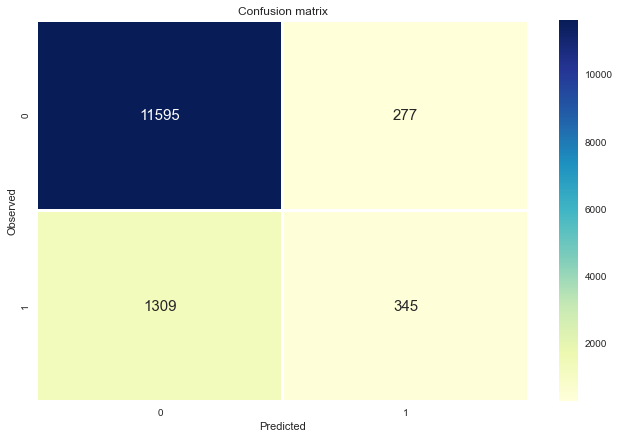


Recall: 0.20858524788391777
Precision: 0.5546623794212219
F1 Score: 0.30316344463971884
Roc Auc Score: 0.5926265188206651


In [92]:
bank_mdl = LogisticRegression(random_state=42,penalty='l2', solver='liblinear',C= 0.75) 
bank_mdl.fit(X_train, y_train)
y_predict = bank_mdl.predict(X_test)
print("Trainig accuracy",bank_mdl.score(X_train,y_train))  
print("Testing accuracy",bank_mdl.score(X_test, y_test))
print('Confusion Matrix')
draw_cnf_mat(y_test,y_predict)
print("\nRecall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### Data Insight 
As the requirement is to identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio, we are looking precision score to be high 

- Training and Test Score both hovering around 90%
- Though the recall is around 20%, precision score is near to 55% 

## Decision tree model 

In [93]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [94]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Training and Test Accuracy - Decision Tree

In [95]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.85


### Data Insight
There is a high degree of overfitting in the model due to which the test accuracy 15% gap between Test and Train. Lets do prunning to find out how it is helping the test accuracy.

In [96]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Data Insight 
- Keeping the level as 3 only if the depth increased by level 2 the gain is 1% and if increased by 8 gain is 2% but then tree becomes complex and hard to explain

In [97]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.88


In [98]:
y_train.value_counts()

0    27942
1     3617
Name: Target_Int, dtype: int64

## Visualizing the tree

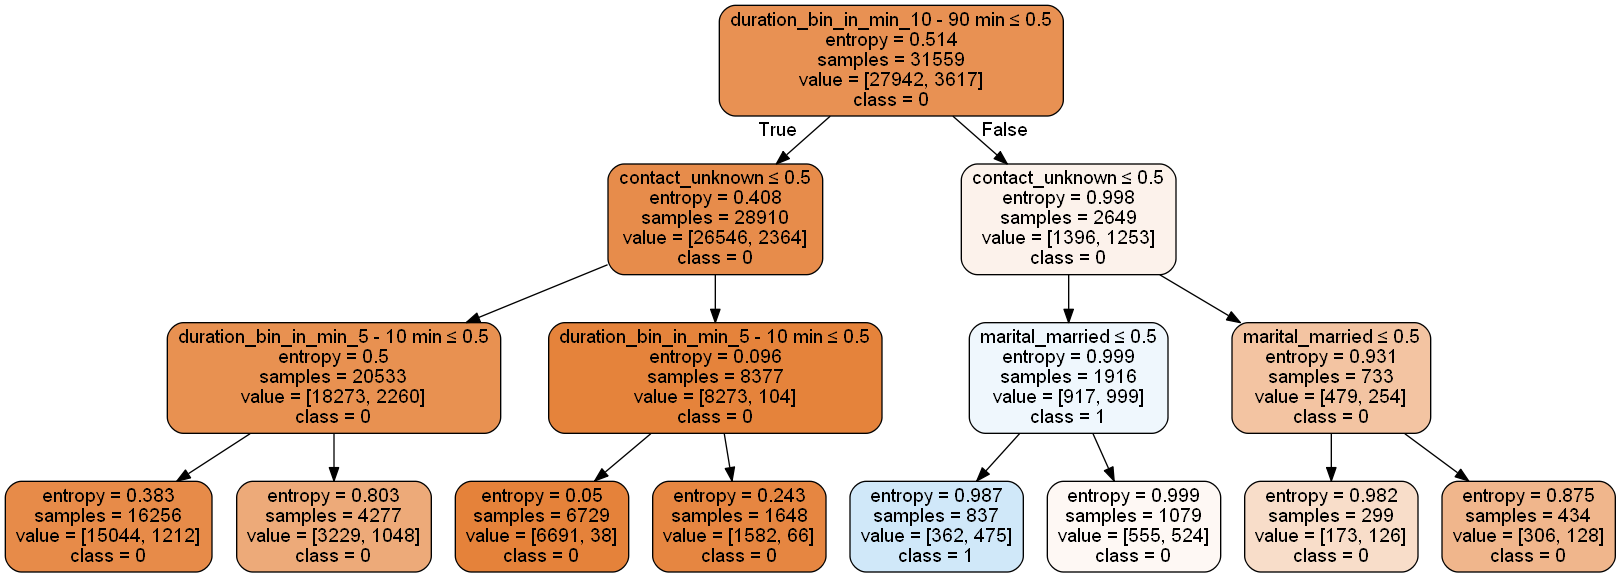

In [99]:
dot_data = StringIO()
features = list(X.columns.values)
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_target.png')
Image(graph.create_png())

In [100]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

## Decision tree performance

In [101]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11728,144
1,1444,210


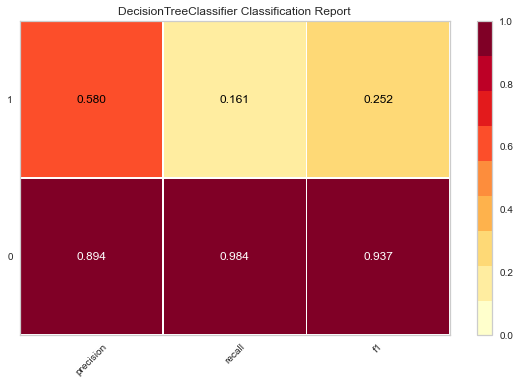

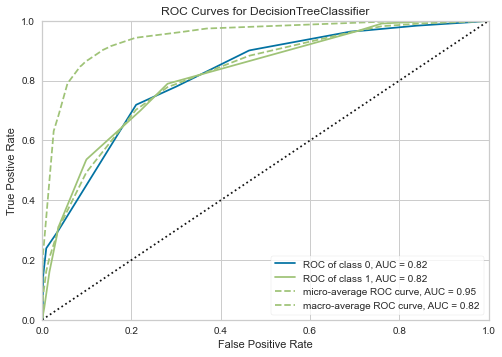

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [102]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Data Insight 
- Precision and Area under curve is much more better than the Logistic Regression 
- Model is performing better than Logistic Regression

In [103]:
features = [col for col in df_bank_mdl.columns if col != 'Target_Int']
features

['job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'contact',
 'campaign',
 'pdays',
 'duration_bin_in_min',
 'age_bins']

In [104]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.882596


## Random forest model 

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [106]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [107]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.882596
0,Random Forest,0.875721


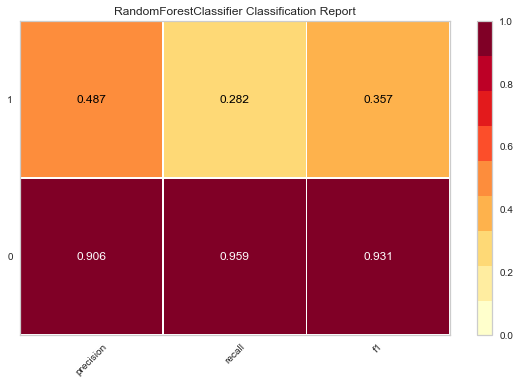

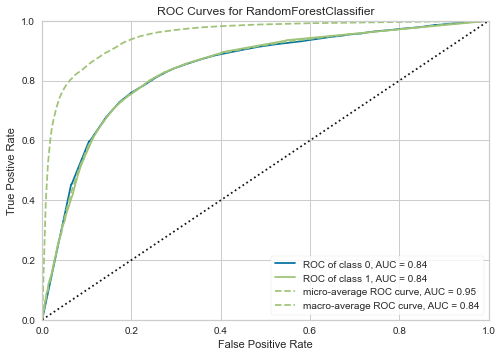

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [108]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Data Insight
Compared to the decision tree, accuracy has dropped slightly for the Random forest model

## Adaptive boosting Ensemble model

In [109]:
abcl = abc(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [110]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [111]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.882596
0,Random Forest,0.875721
0,Adaboost,0.879861


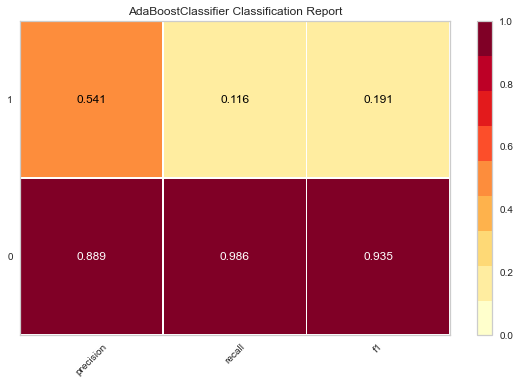

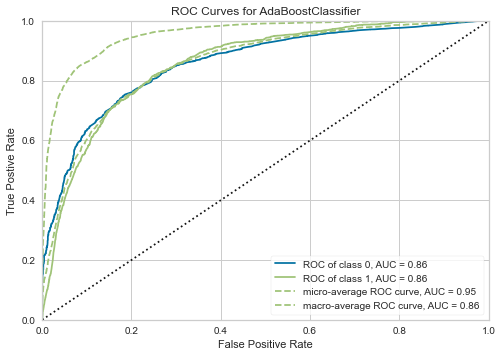

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [112]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(abc(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(abc(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Bagging Ensemble model

In [113]:
bgcl = bc(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [114]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [115]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.882596
0,Random Forest,0.875721
0,Adaboost,0.879861
0,Bagging,0.881488


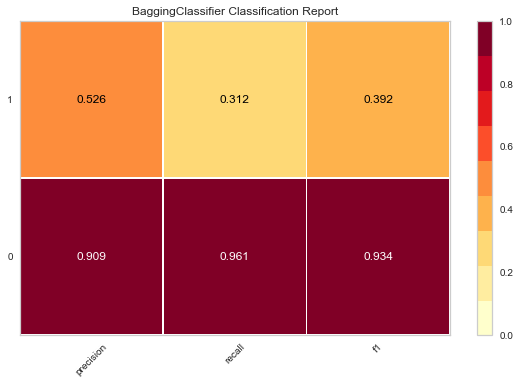

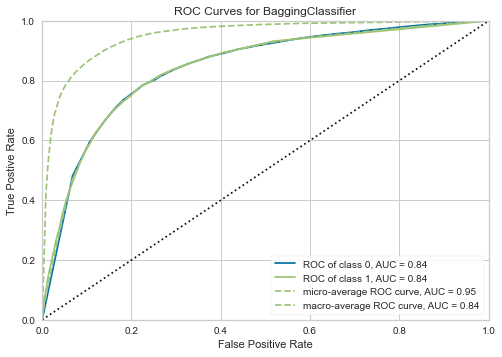

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [116]:
viz = ClassificationReport(bc(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(bc(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Gradient boosting Ensemble model

In [117]:
gbcl = gbc(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [118]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [119]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.882596
0,Random Forest,0.875721
0,Adaboost,0.879861
0,Bagging,0.881488
0,Gradient Boost,0.886811


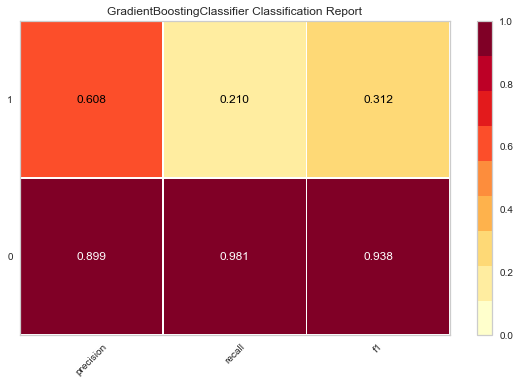

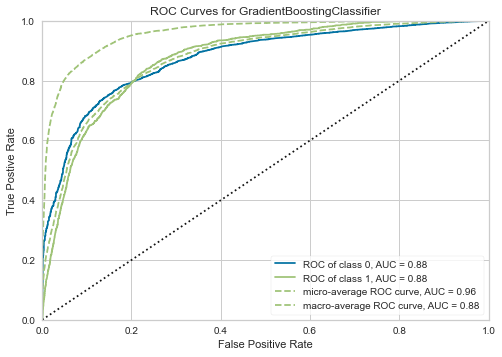

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [120]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(gbc(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(gbc(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [121]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

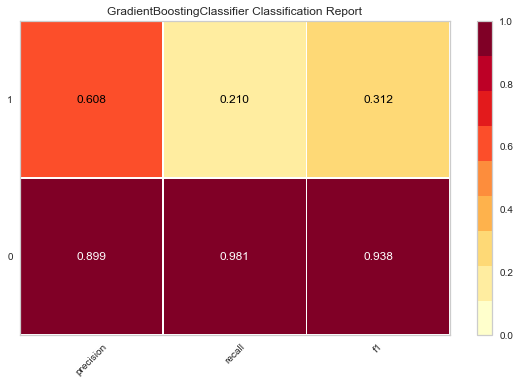

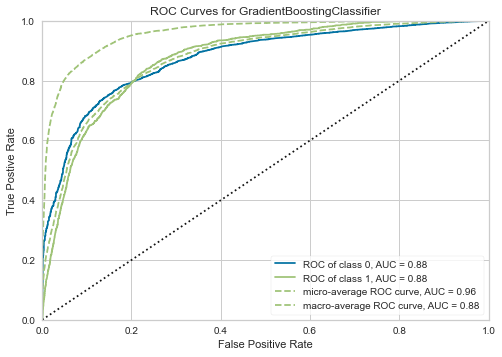

In [122]:
visClassifierResults(gbc(n_estimators = 50, learning_rate = 0.1, random_state=22))

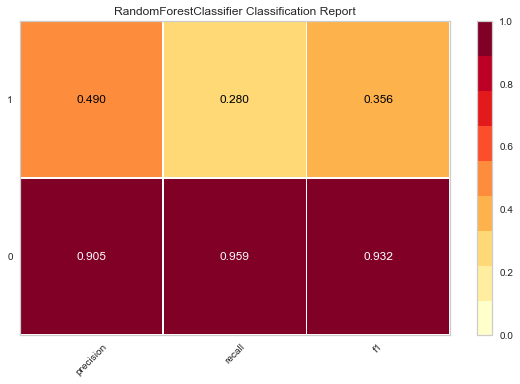

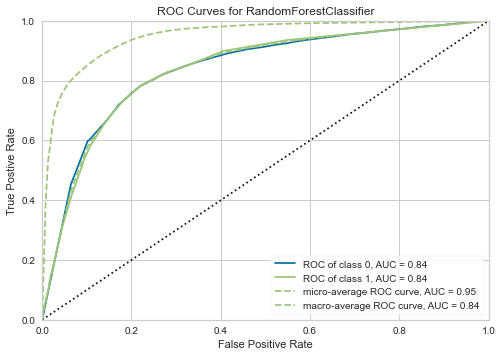

In [123]:
visClassifierResults(rfc(n_estimators = 50))

In [124]:
resultsDf.reset_index(drop=True)

,Method,accuracy
0,Decision Tree,0.882596
1,Random Forest,0.875721
2,Adaboost,0.879861
3,Bagging,0.881488
4,Gradient Boost,0.886811


## Summary 
- Among all the algorithm technique applied, Gradient Boosting performs better than other in terms of accuracy